In [12]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds 
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
#create a directory of the dataset
flower_photos_dir='C:\\users\\755361\\OneDrive - hull.ac.uk\\My Pictures\\flower_photos'

#split dataset into 80% Training and test 20%
train_ds = image_dataset_from_directory(
  flower_photos_dir,
  validation_split=0.2,
  subset="training",
  seed=42, 
  batch_size= None)

test_ds = image_dataset_from_directory(
   flower_photos_dir,
   subset="validation",
   validation_split=0.2,  
   seed=42,
   batch_size=None)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
#extract the arrays from train dataset
x_train = []
y_train = []
for x, y in train_ds:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

#convert list to arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
#extract the arrays from test dataset
x_test = []
y_test = []
for x, y in test_ds:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

#convert list to arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [17]:
#extract the arrays from test dataset
x_test = []
y_test = []
for x, y in test_ds:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

#convert list to arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [18]:
#Print the shape of each array.
print("x_train shape is:", x_train.shape)
print("x_test shape is:", x_test.shape)
print("y_train shape is:", y_train.shape)
print("y_test shape is:", y_test.shape)

x_train shape is: (2936, 256, 256, 3)
x_test shape is: (734, 256, 256, 3)
y_train shape is: (2936,)
y_test shape is: (734,)


In [19]:
#Print class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


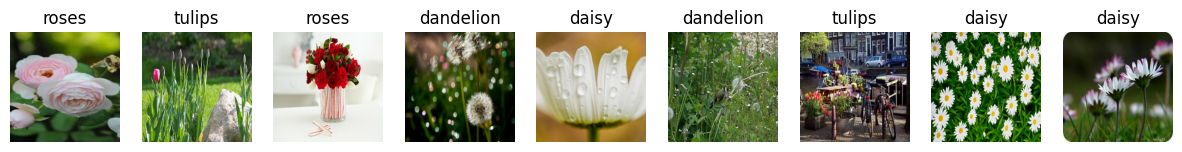

In [20]:
# Use matplotlib to create a figure with 5 sub-plots
fig, axs = plt.subplots(1, 9, figsize = (15, 3))
# Loop through the first five images in the training set.
for i in range(9):
    # Use the imshow function in matplotlib to plot the
    # image in the corresponding sub-plot in the figure.
    axs[i].imshow(x_train[i], cmap = "gray")
    # Print the class label for this image
    # in the title for the sub-plot.
    axs[i].set_title(class_names[y_train[i]])
    # When plotting images, it is best to switch
    # off the axes, so you just see the image itself.
    axs[i].axis("off")
# Show the final figure.
plt.show()


In [21]:
# Use the to_categorical function from Kears
# to convert the output data to use
# One Hot Encoding.
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [22]:
# Iterate over the first batch of the training dataset 'train_ds' and extract the images and labels.
# 'train_ds.take(1)' retrieves one batch of data (images and their corresponding labels).
for images, labels in train_ds.take(1):
  print(labels)

tf.Tensor(3, shape=(), dtype=int32)


In [23]:
# Iterate over the first batch of the training dataset 'train_ds' to extract images and labels.
# 'train_ds.take(1)' retrieves one batch of data.
for images, labels in train_ds.take(1):
  print(labels.numpy().astype(int))

2


In [24]:
# Normalise the images by dividing by 255,
# so all pixel values lie in the range
# 0 - 1
x_train_norm = x_train / 255.
x_test_norm = x_test / 255.

# Record the width and height of each image, in pixels.
width_npix = x_train_norm.shape[1]
height_npix = x_train_norm.shape[2]

In [25]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
rotation_range = 20, # Randomly rotate images up to 10 degrees
width_shift_range = 0.1, # Randomly shift images horizontally up to 10% of␣the width
height_shift_range = 0.1, # Randomly shift images vertically up to 10% of␣the height
horizontal_flip = True, # Randomly flip images horizontally
vertical_flip = False, # Don't randomly flip images vertically
shear_range = 0.10, # crops part of the image
zoom_range = 0.10, # #zooms the image by 10%
validation_split =0.2 # Set the validation split
)

# Fit the transformation to the training dataset
train_datagen.fit(x_train_norm)

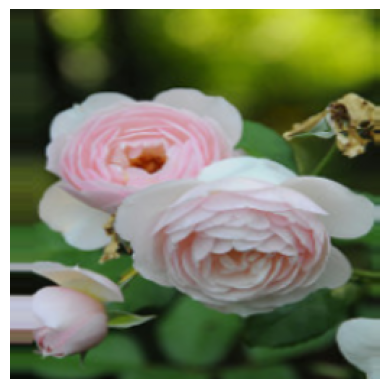

In [26]:
# Apply the random_transform function to the first image
# in the normalised training set, i.e. x_train_norm[0].
new_image = train_datagen.random_transform(x_train_norm[0])

# use matplotlib to show this image.
plt.imshow(new_image, cmap = "gray")

# The following line of code will remove the axes from the image.
plt.gca().axis("off")

# Show the figure.
plt.show()

# Defining the architecture for our CNN

In [27]:
# Create an instance of the Sequential class.
model = Sequential()

# Conv2D (for 2-dimensional convolutional layers),
# MaxPooling2D (for 2-dimensional pooling layers),
# and Flatten (to flatten the output from the last
# pooling layer ready to go into the fully connected part
# of the network).
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()

# Add the first Convolutional layer. using 32 filters which will each be convolved with the input data to 
#produce 32 feature maps, a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(32, (3,3), input_shape=(width_npix, height_npix, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))

# After the final pooling layer,add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding to the 5 output classes.  use the
#softmax activation function, which means the resulting
# output values will represent the probabilities for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

# Compile the model

In [28]:
# Since learning rate can't be specified, import the Adam class from the Keras library.
from tensorflow.keras.optimizers import Adam

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem, use the categorical cross entropy for the
# loss function, and the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [29]:
# Specify the batch size to use when
# training the model.
batch_size = 32

# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(
    train_datagen.flow(x_train_norm, y_train_cat, batch_size=batch_size, subset="training"),
    epochs=10,
    validation_data=train_datagen.flow(x_train_norm, y_train_cat, batch_size=batch_size, subset="validation")
)


Epoch 1/10
74/74 [==============================] - 111s 1s/step - loss: 1.5625 - accuracy: 0.3129 - val_loss: 1.2615 - val_accuracy: 0.4123
Epoch 2/10
74/74 [==============================] - 104s 1s/step - loss: 1.2983 - accuracy: 0.4283 - val_loss: 1.1863 - val_accuracy: 0.5281
Epoch 3/10
74/74 [==============================] - 106s 1s/step - loss: 1.1876 - accuracy: 0.5023 - val_loss: 1.0967 - val_accuracy: 0.5690
Epoch 4/10
74/74 [==============================] - 105s 1s/step - loss: 1.1079 - accuracy: 0.5662 - val_loss: 0.9619 - val_accuracy: 0.6525
Epoch 5/10
74/74 [==============================] - 104s 1s/step - loss: 1.0853 - accuracy: 0.5768 - val_loss: 0.9795 - val_accuracy: 0.5843
Epoch 6/10
74/74 [==============================] - 105s 1s/step - loss: 1.0369 - accuracy: 0.5922 - val_loss: 0.9501 - val_accuracy: 0.6184
Epoch 7/10
74/74 [==============================] - 115s 2s/step - loss: 0.9792 - accuracy: 0.6020 - val_loss: 0.9333 - val_accuracy: 0.6542
Epoch 8/10
74

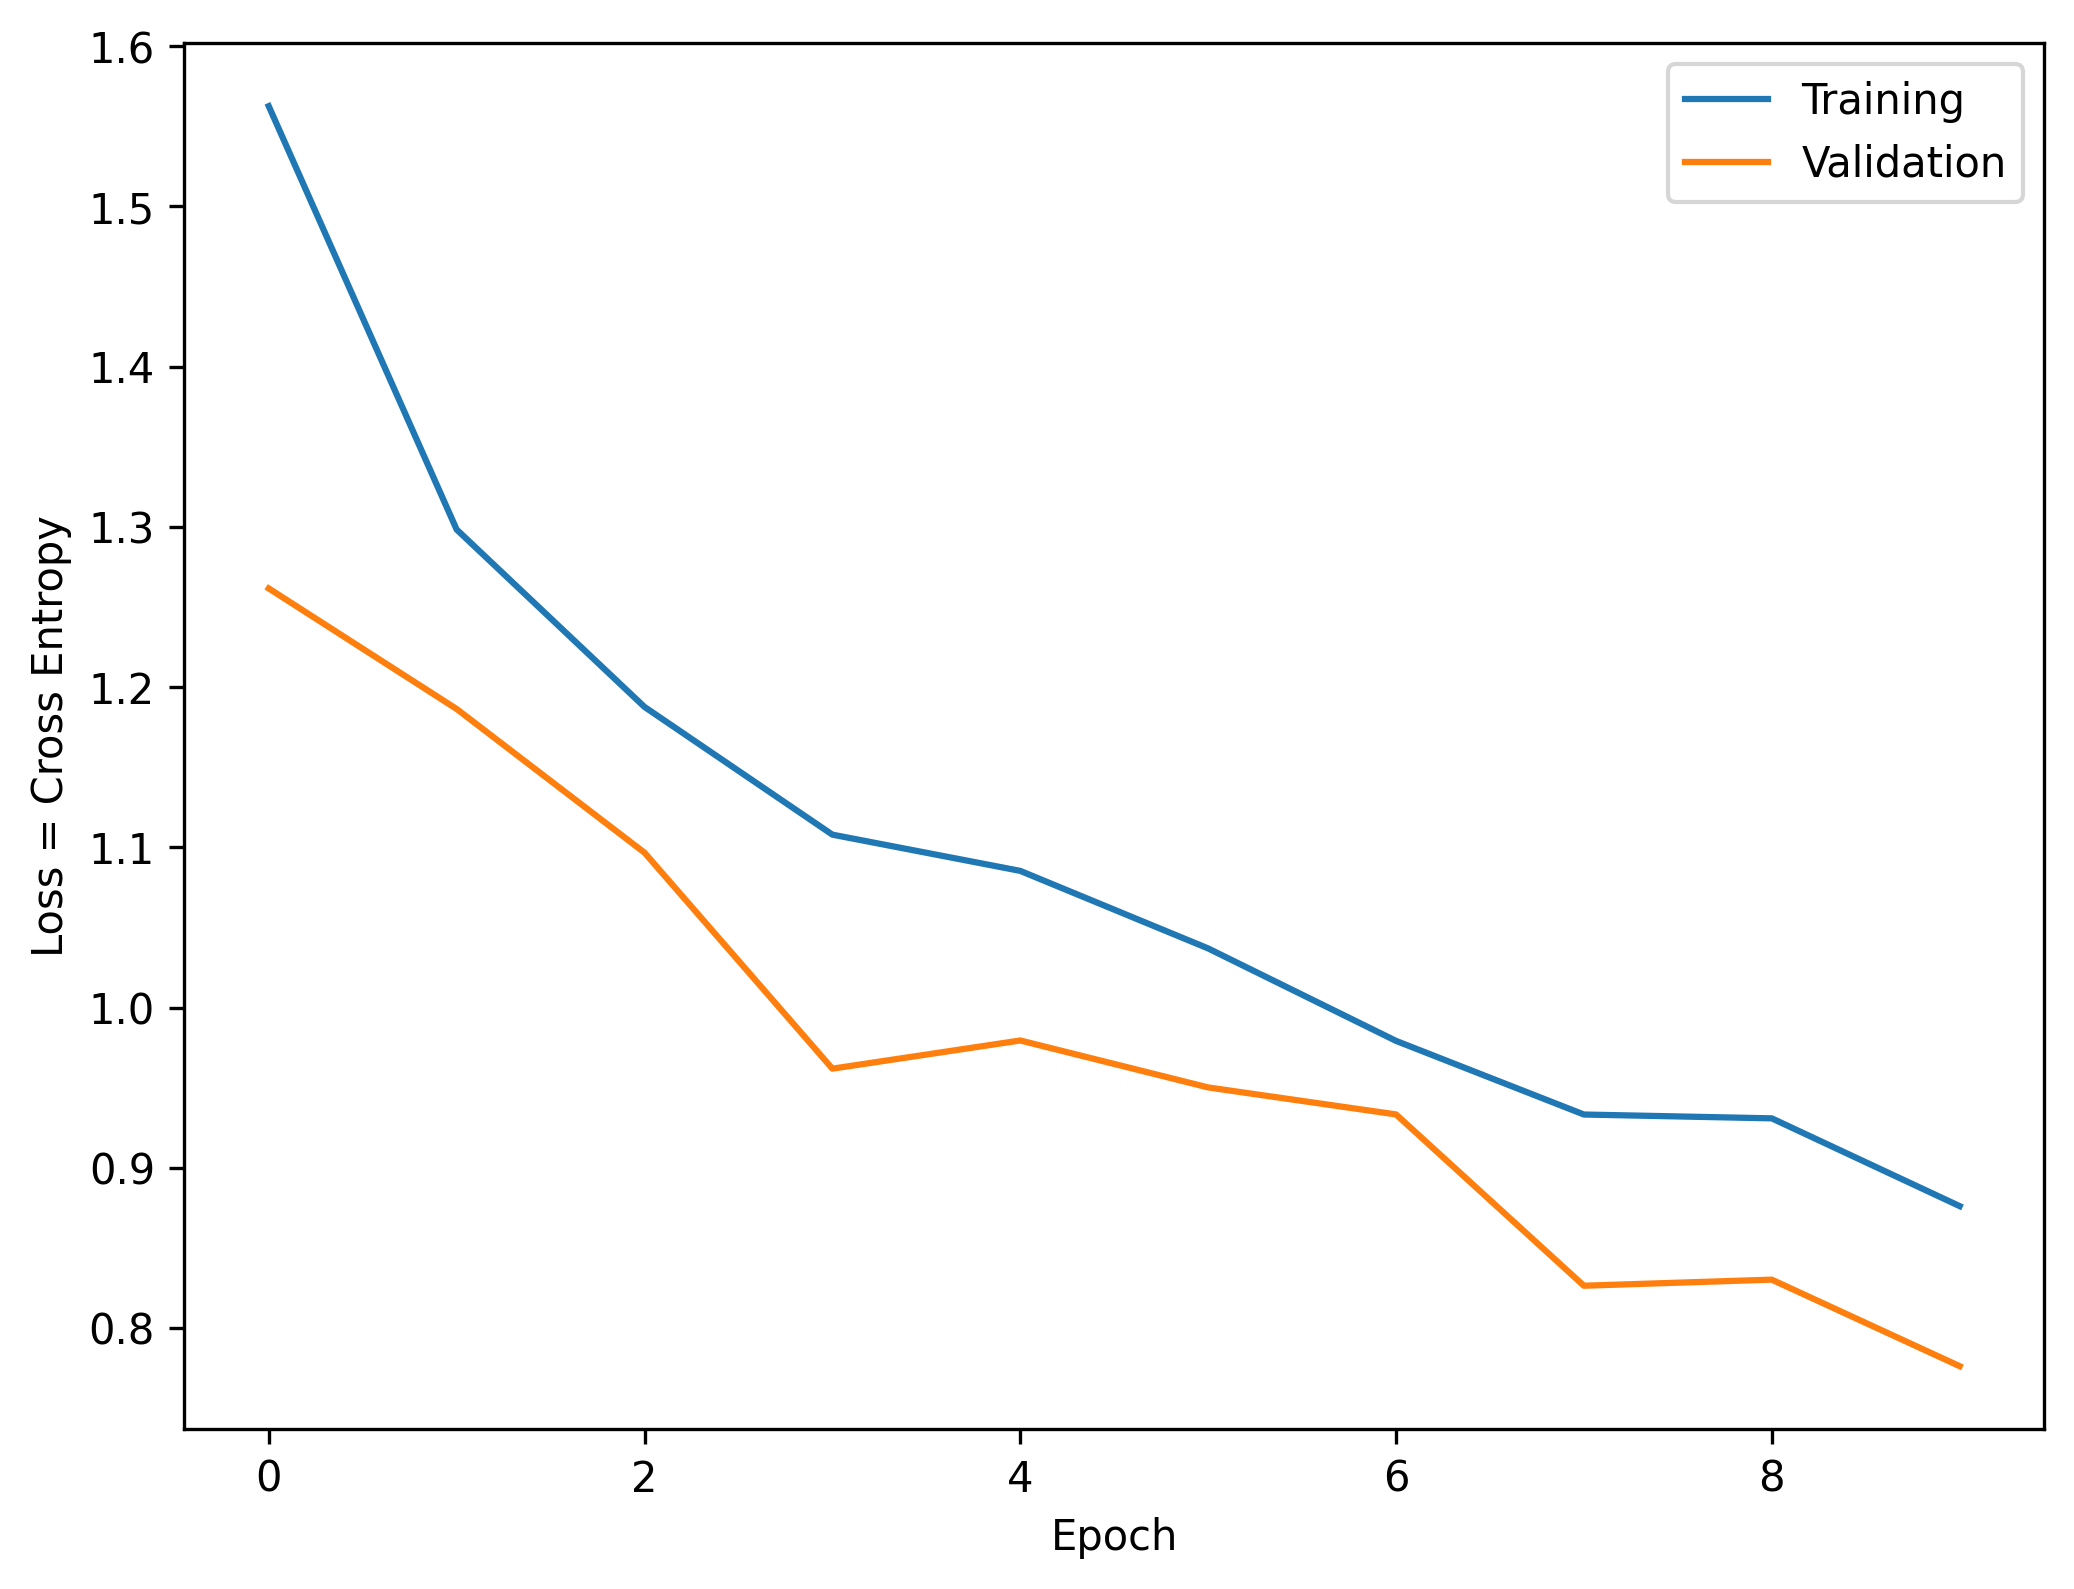

In [30]:
#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")

# Show the plot.
plt.show()

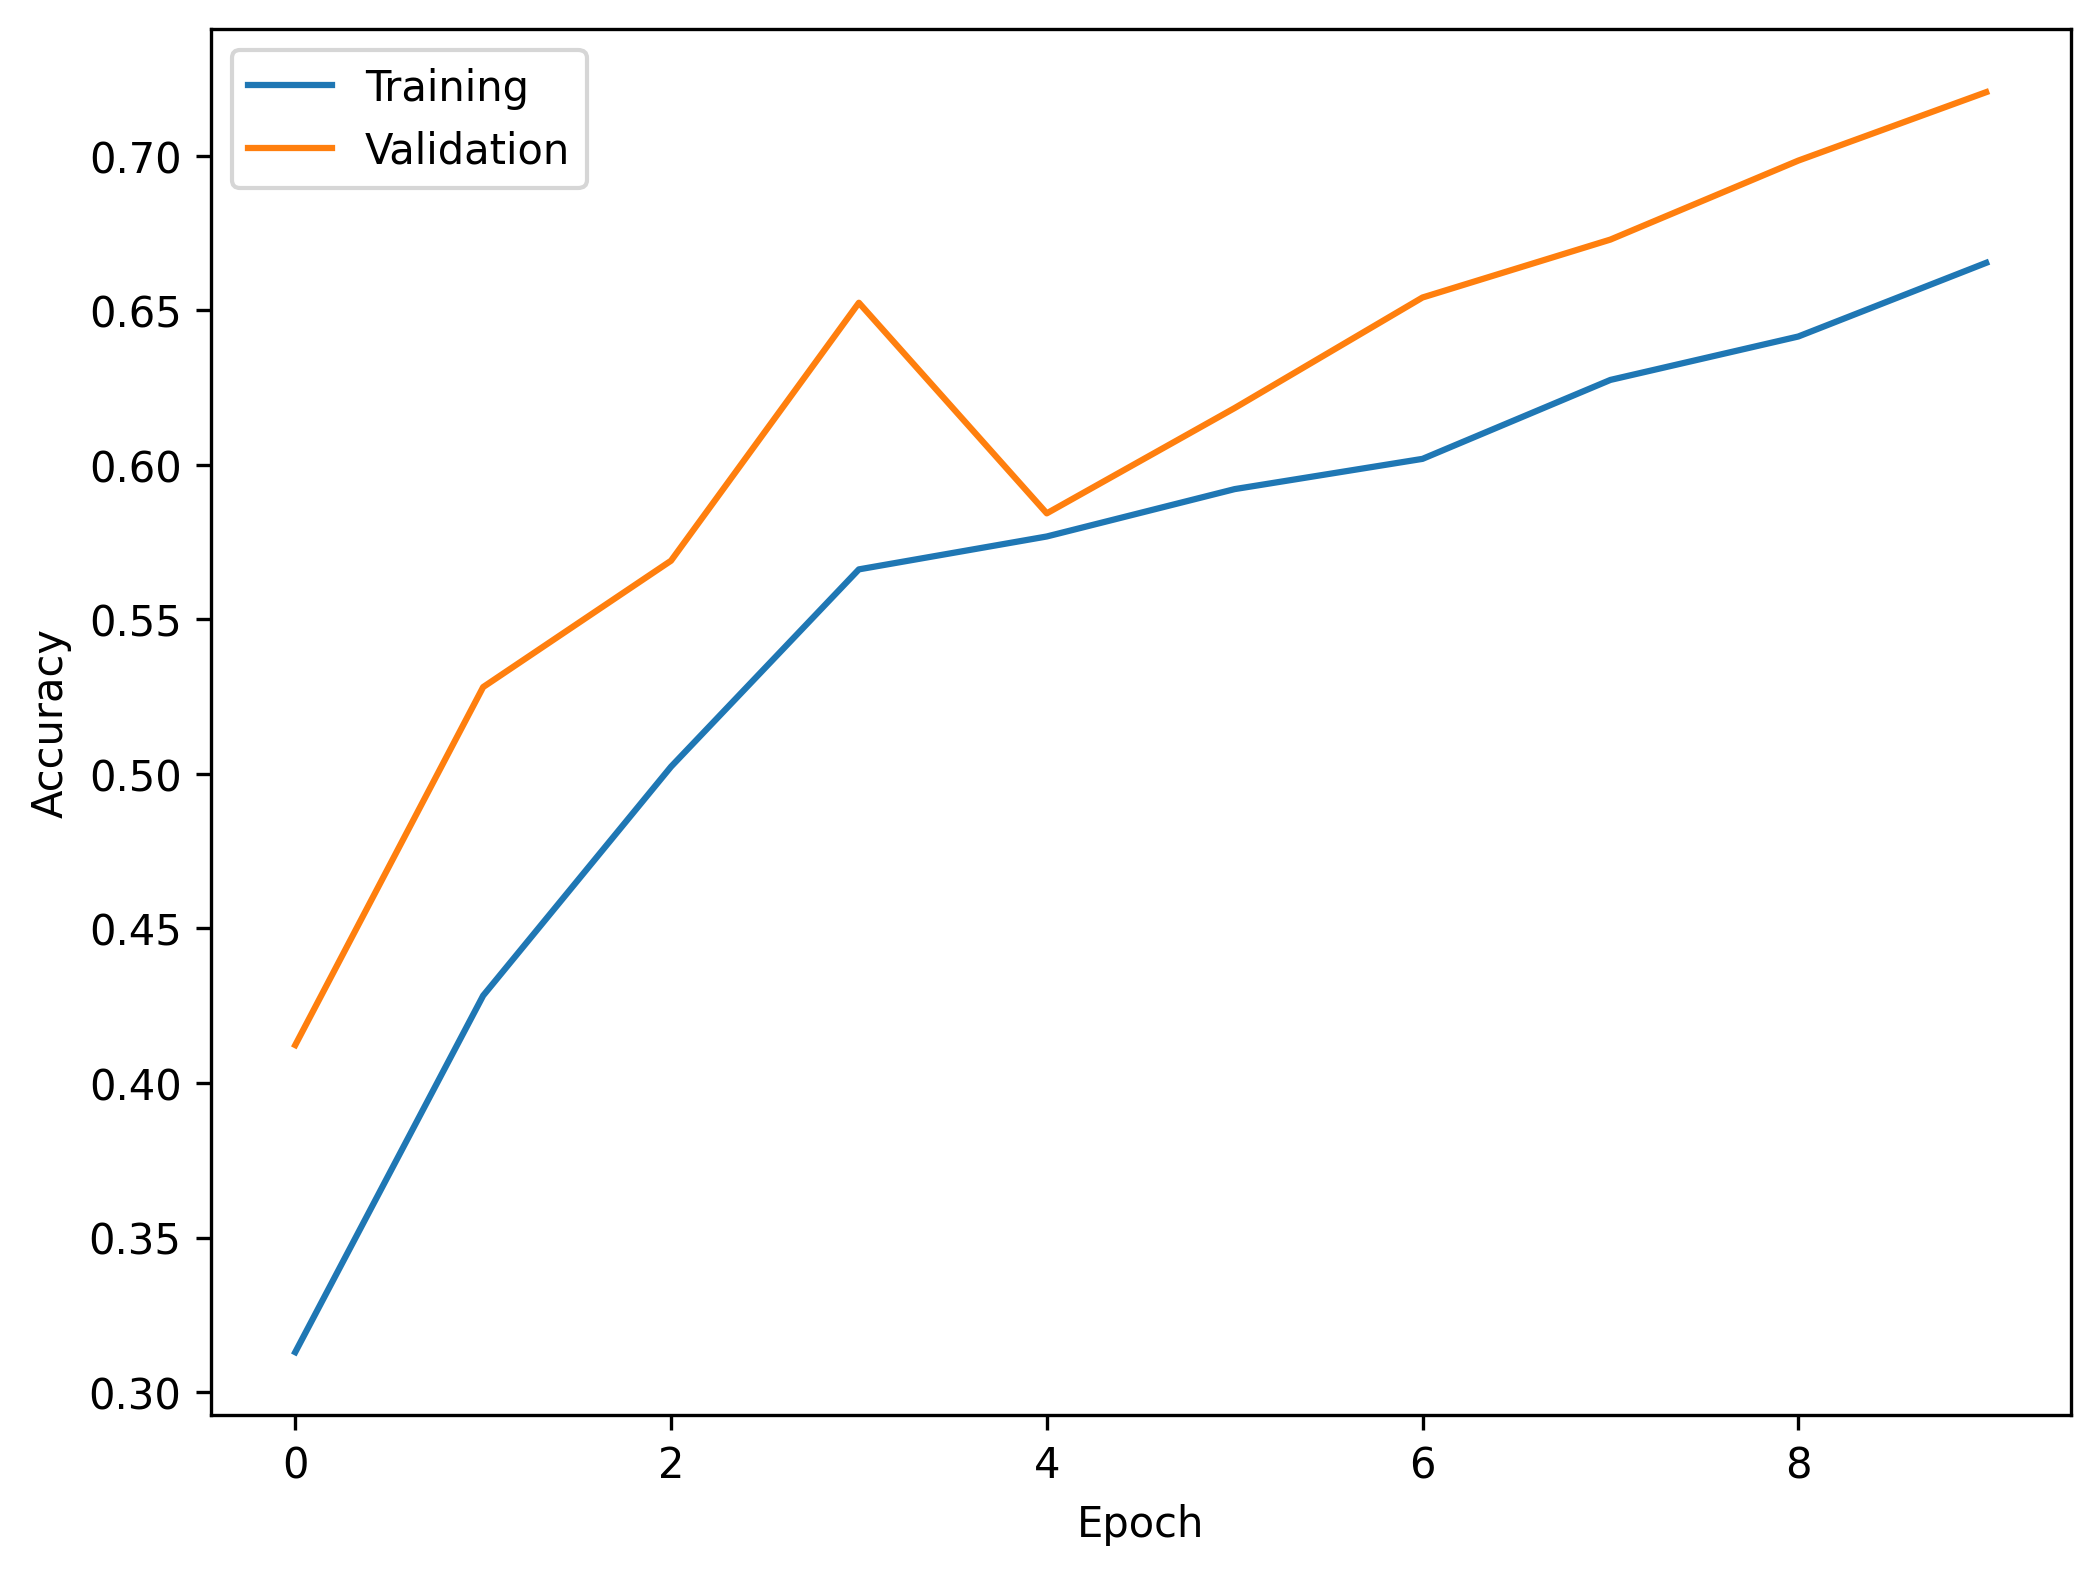

In [31]:
# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Show the plot.
plt.show()

In [32]:
# Before plotting the confusion matrix, find which label corresponds to which index.
# This is actually somewhat trivial in this case,
# as the labels are just the digits 0-9.
# Names of each label
display_labels = ["%d" % (i, ) for i in range(5)]

# Numerical index of each label
numerical_labels = [i for i in range(5)]

# check the label strings and the
# numerical labels to make sure they line up.
print(display_labels)
print(numerical_labels)

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]


In [33]:
# use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)

# the outputs from the model give the
# probability of each class label. use
# the argmax() function to determine the index
# of the label with the highest probability for
# each row in y_pred. These will be our predicted
# class labels.
y_pred_class = np.argmax(y_pred, axis=1)

23/23 [==============================] - 8s 338ms/step


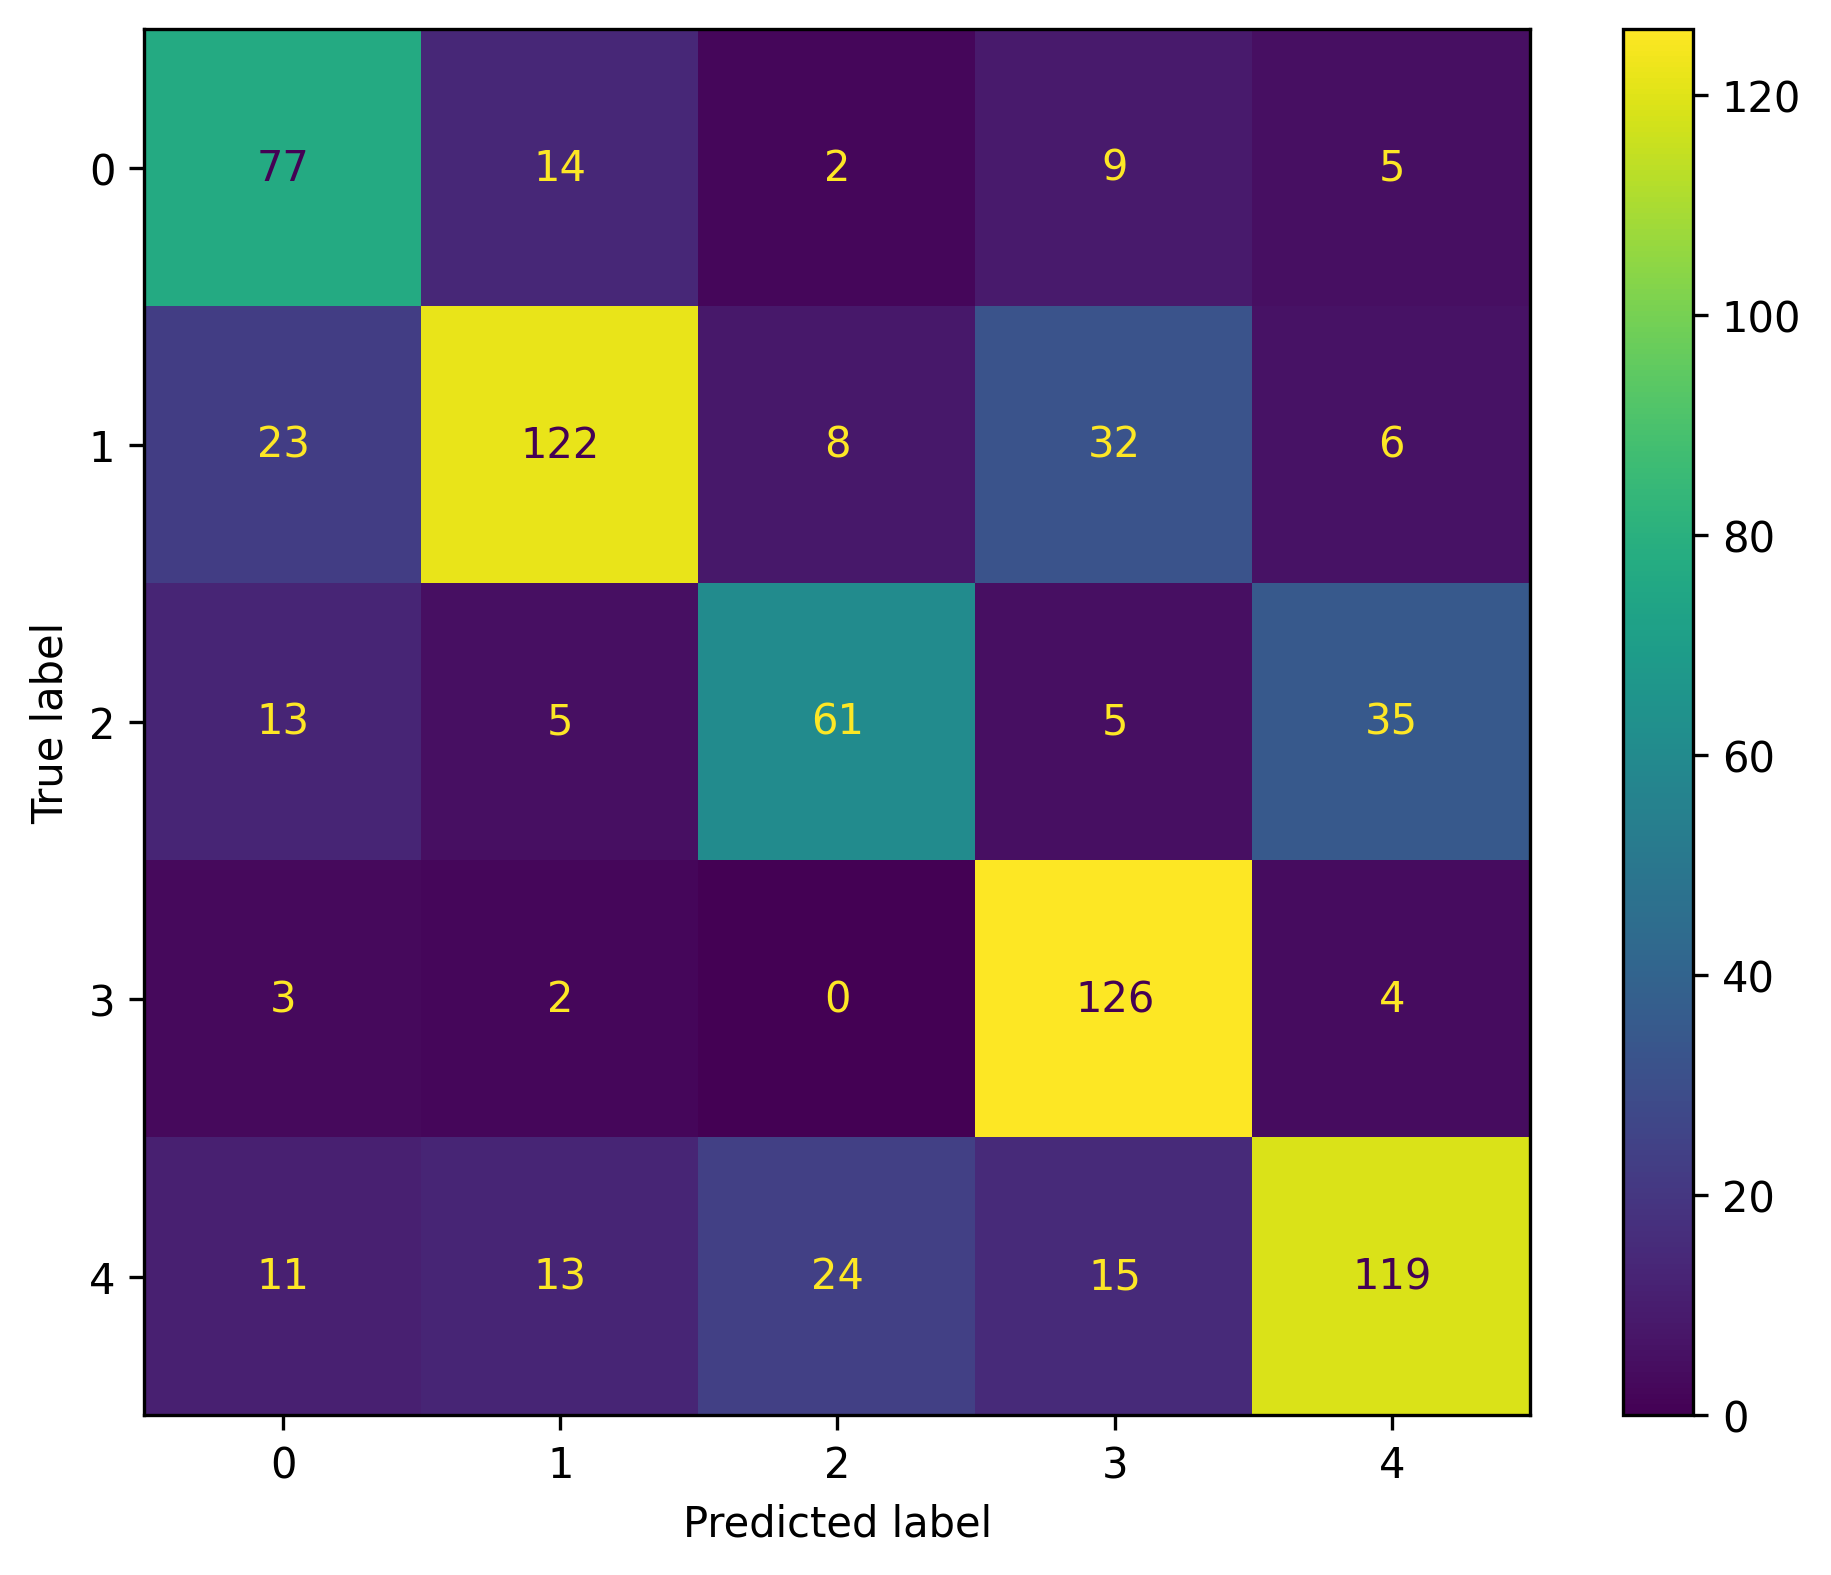

In [34]:
 #Import the functions from sklearn to create and plot the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Hyperparameter Tuning

# Batch Size: First, use a batch size of 64. Then increase to 128¶

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

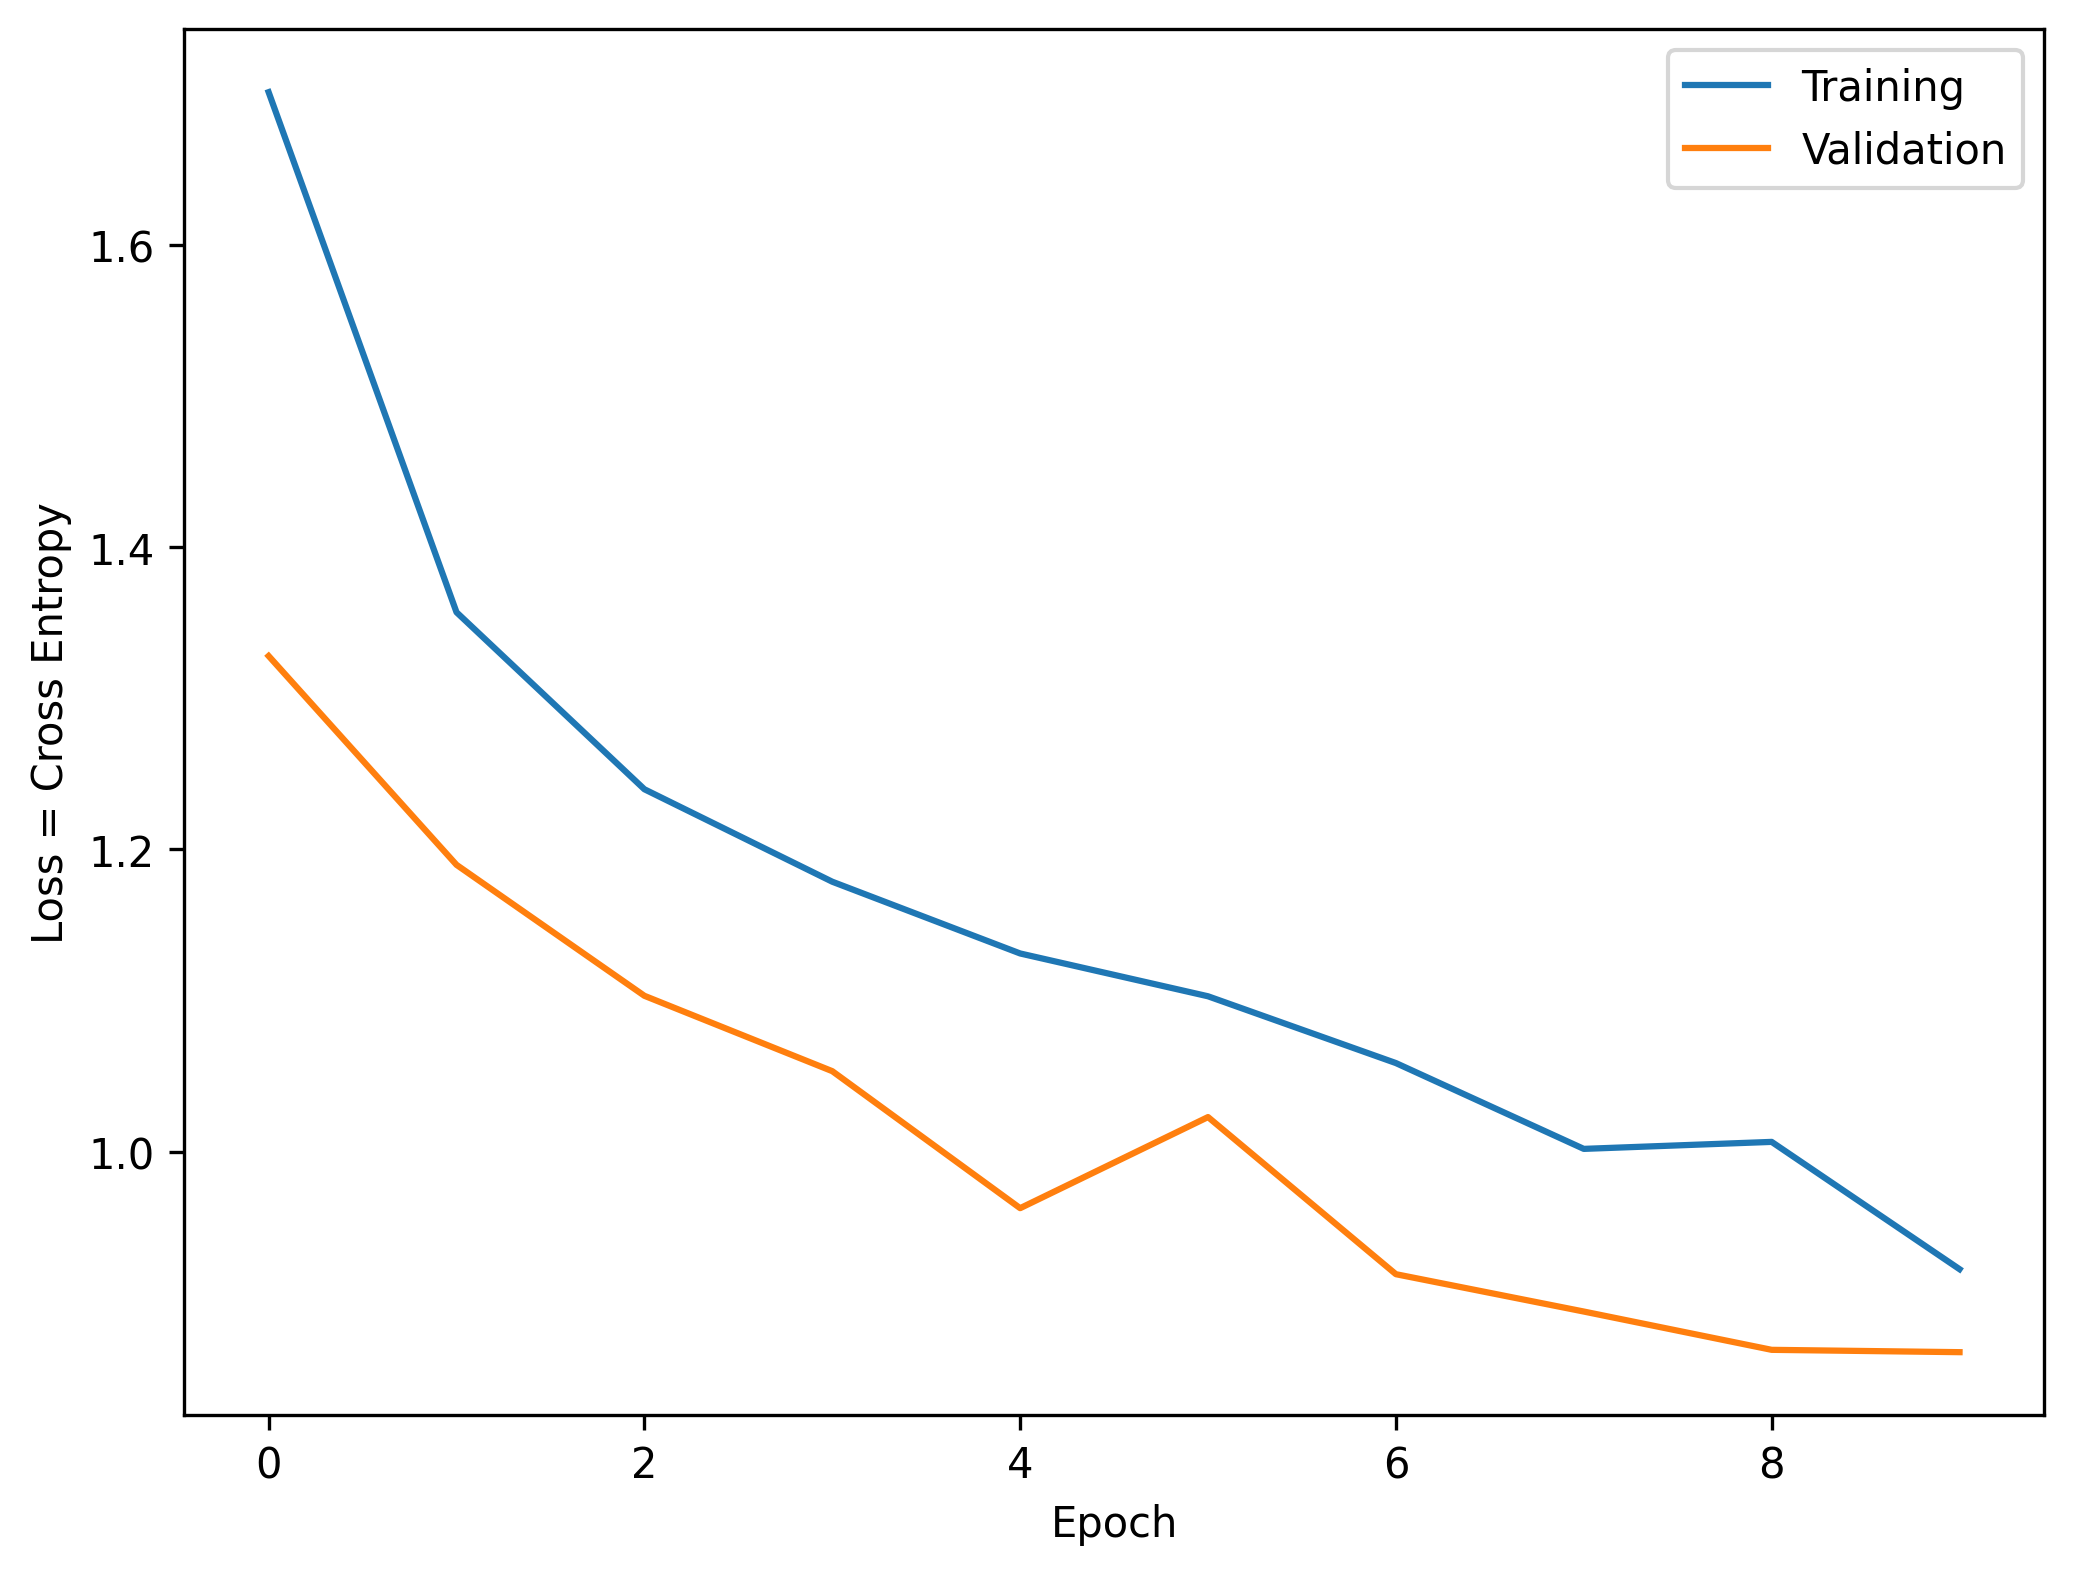

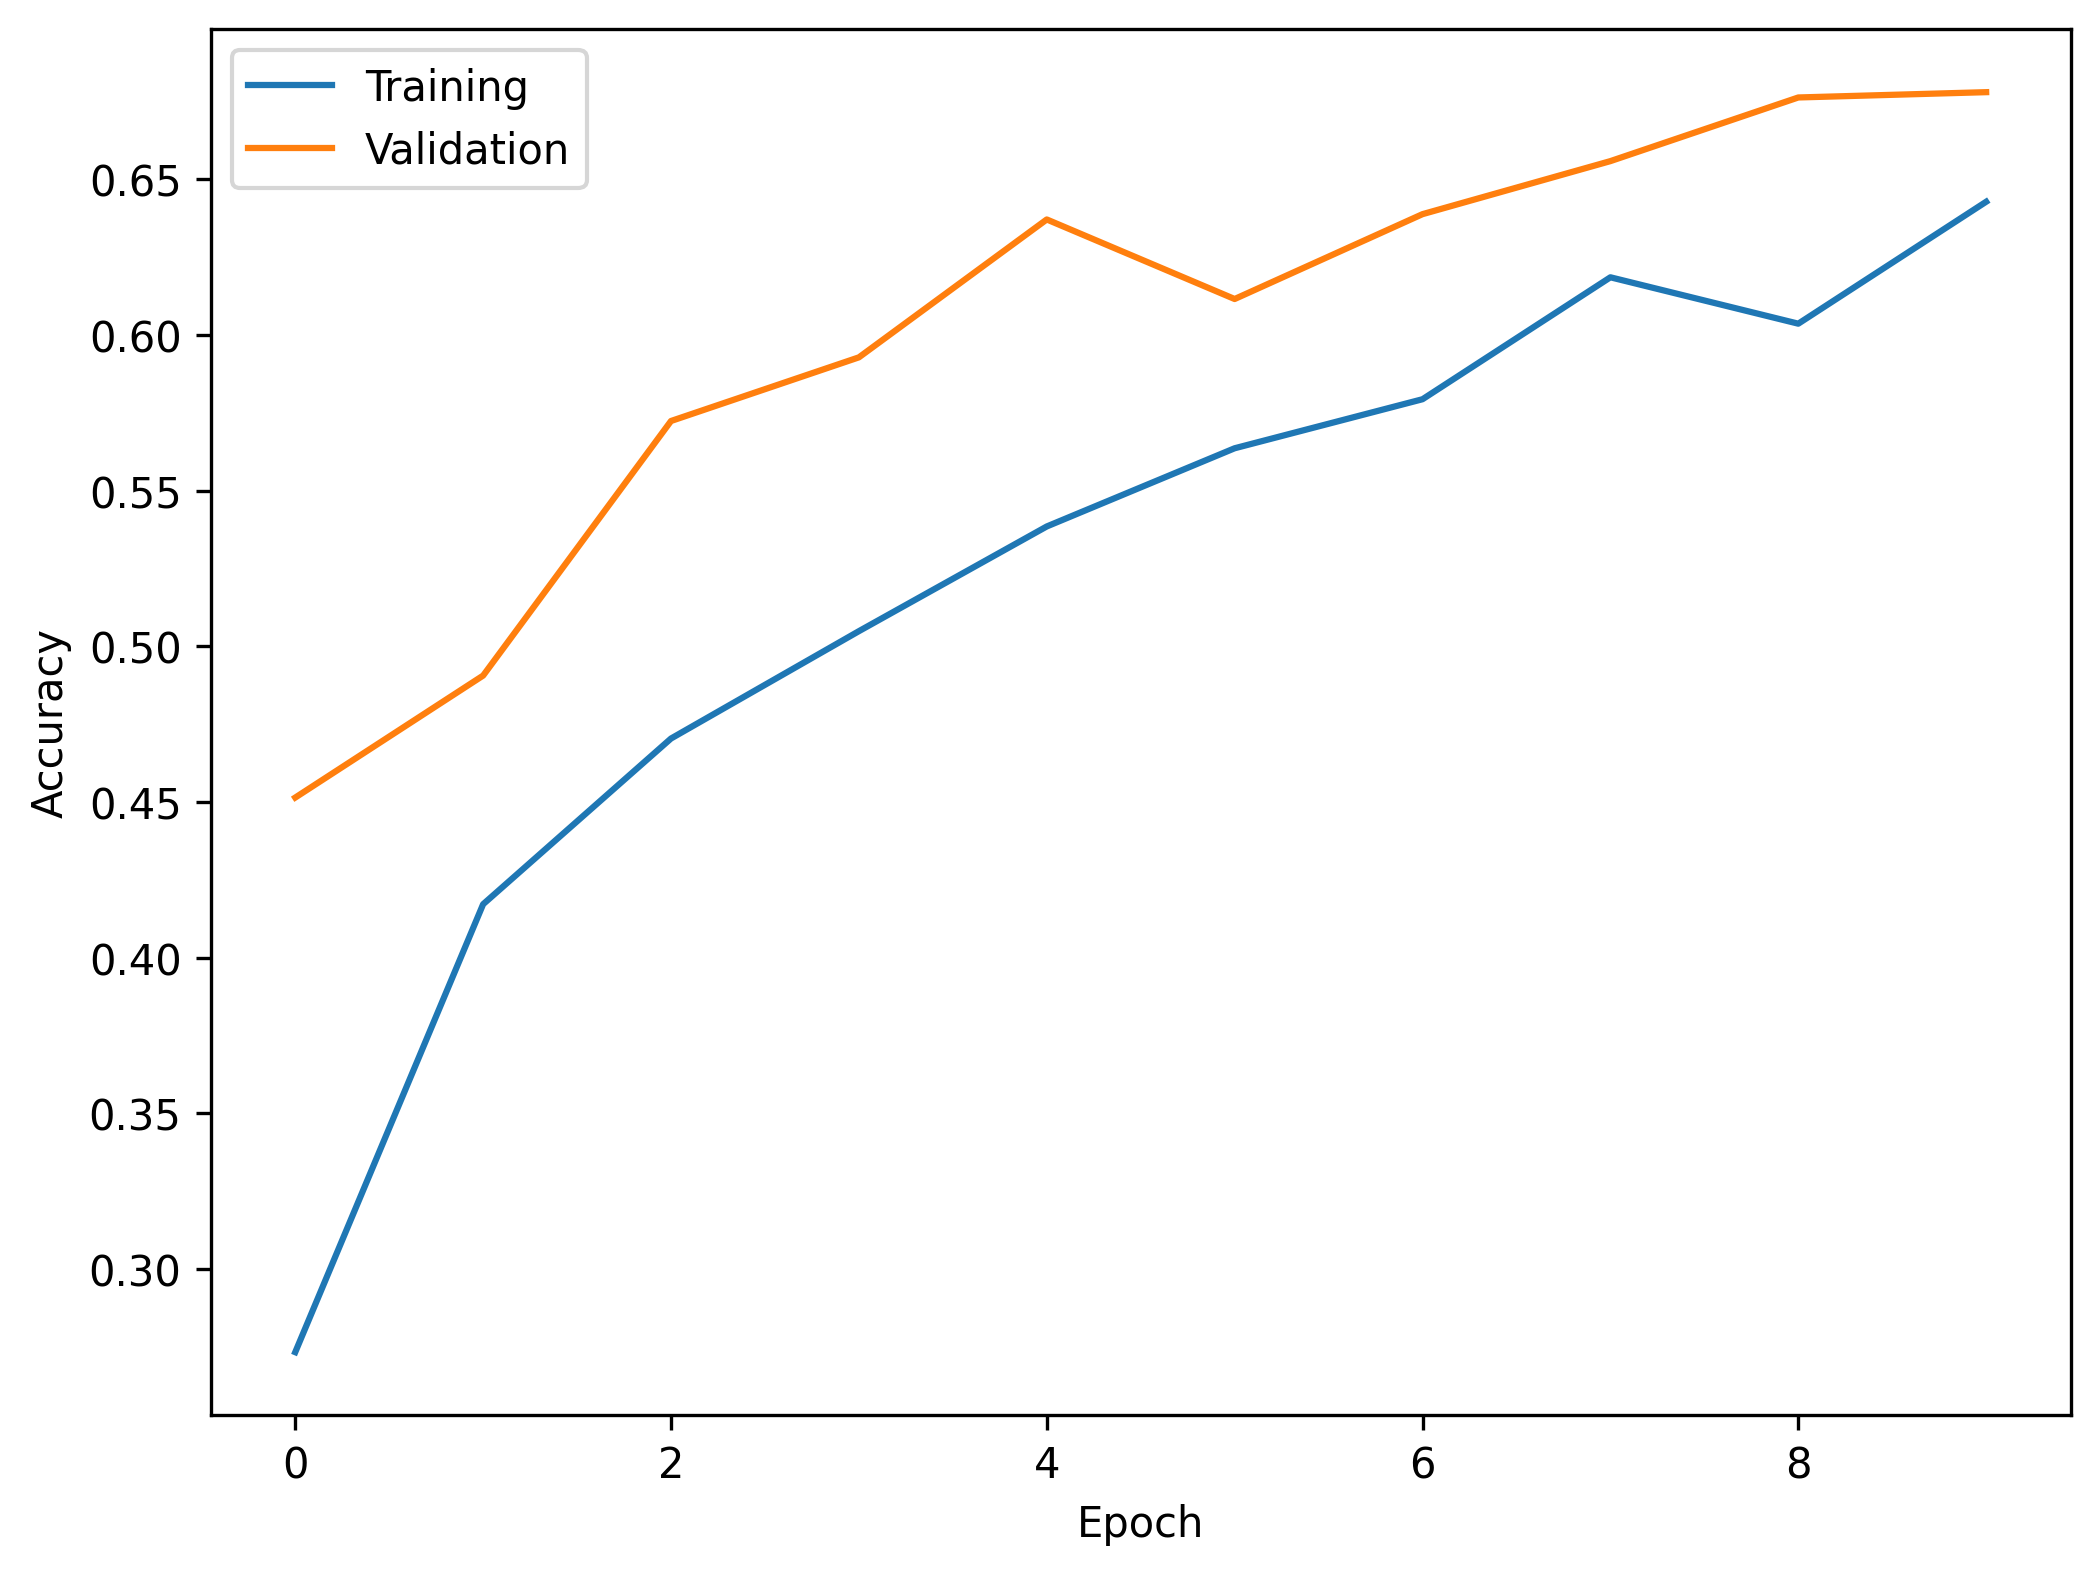

23/23 [==============================] - 7s 311ms/step


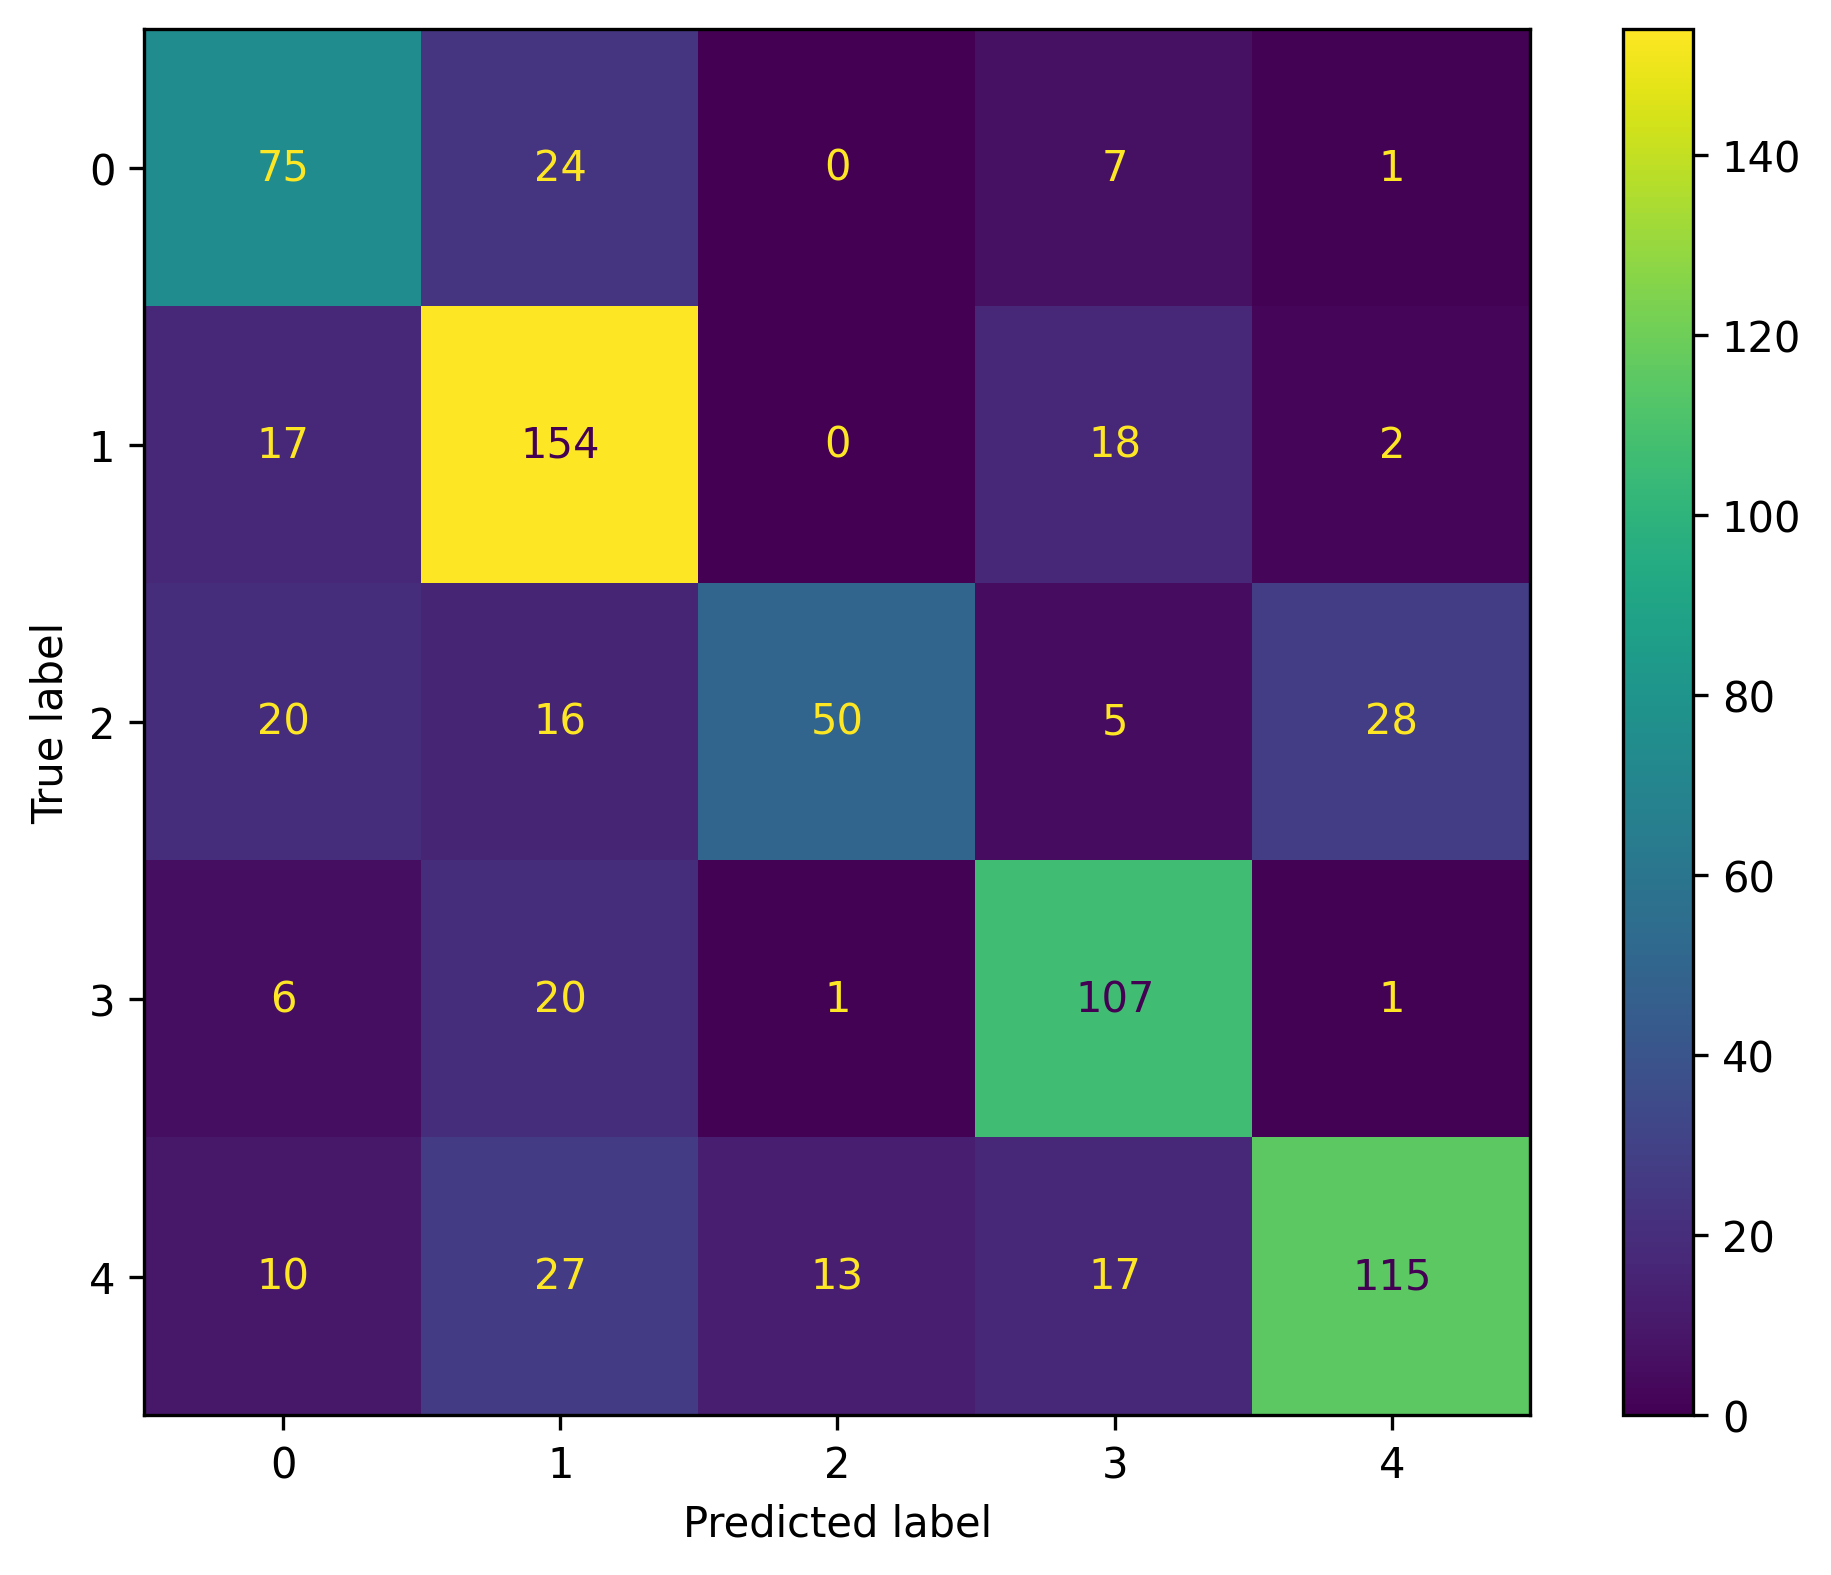

In [35]:
#Inititate model
model = Sequential()

# Add the first Convolutional layer, 32 filters which will each be convolved with the input data to 
#produce 32 feature maps, a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))

# After the final pooling layer,add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax activation function, which means the resulting
# output values will represent the probabilities for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem, use the categorical cross entropy for the
# loss function, and the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128

# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Increase the Stride Length on the Conv2D Layers to 2 and padding

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

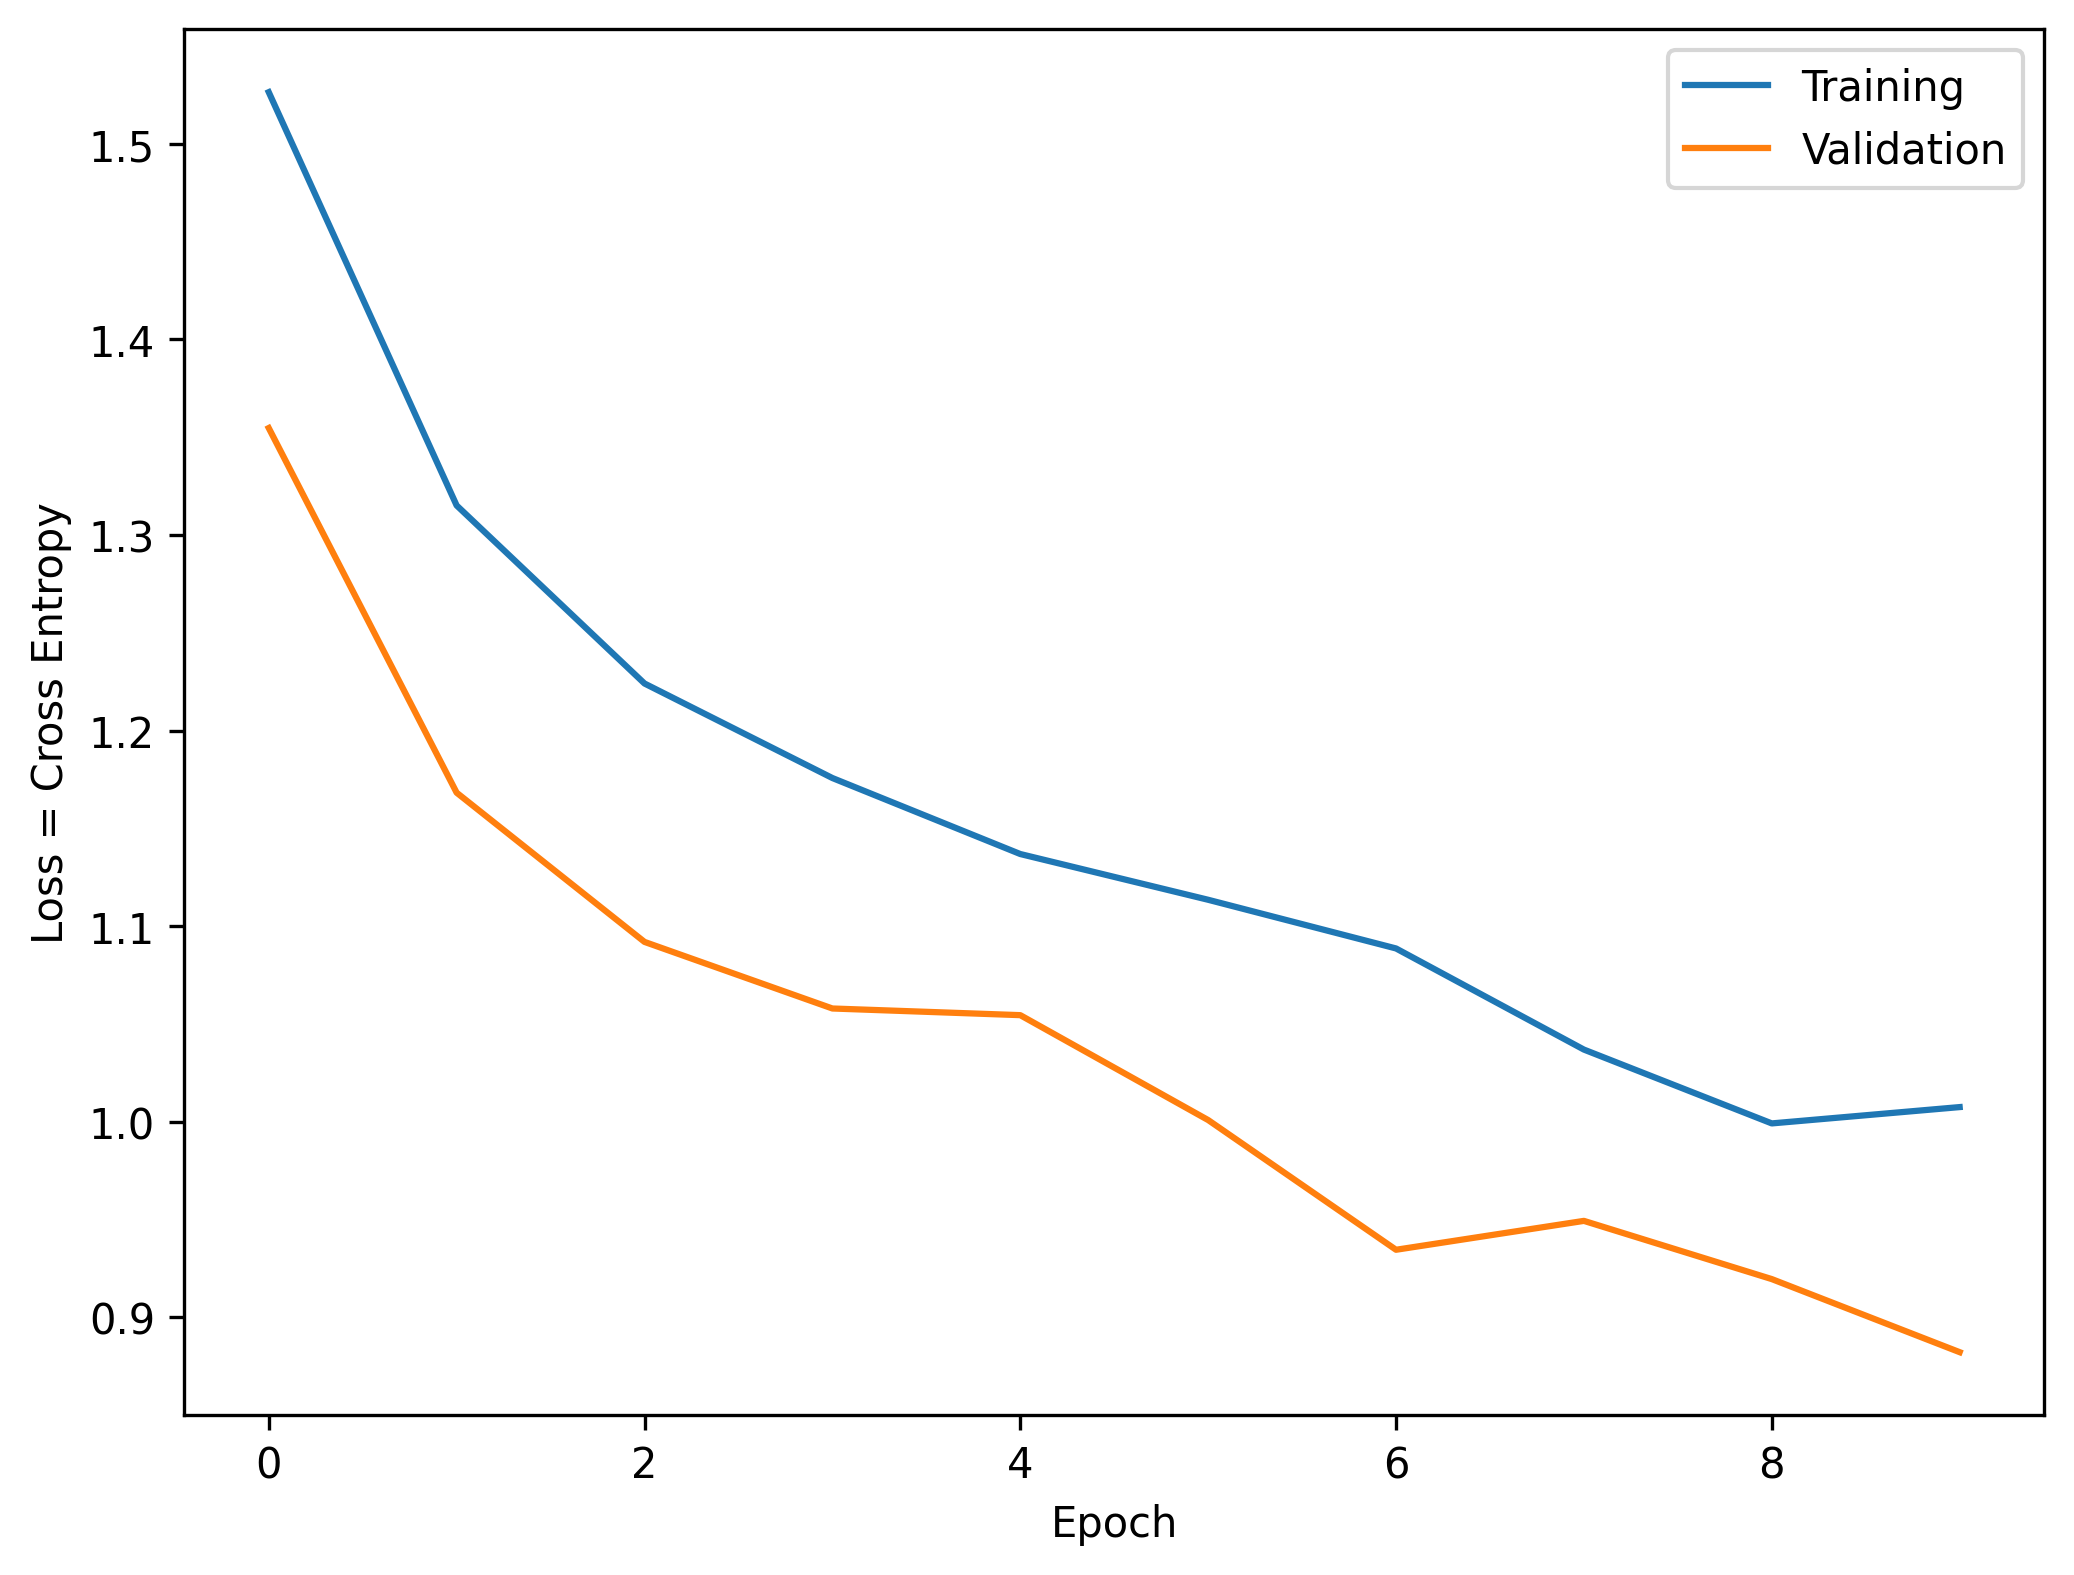

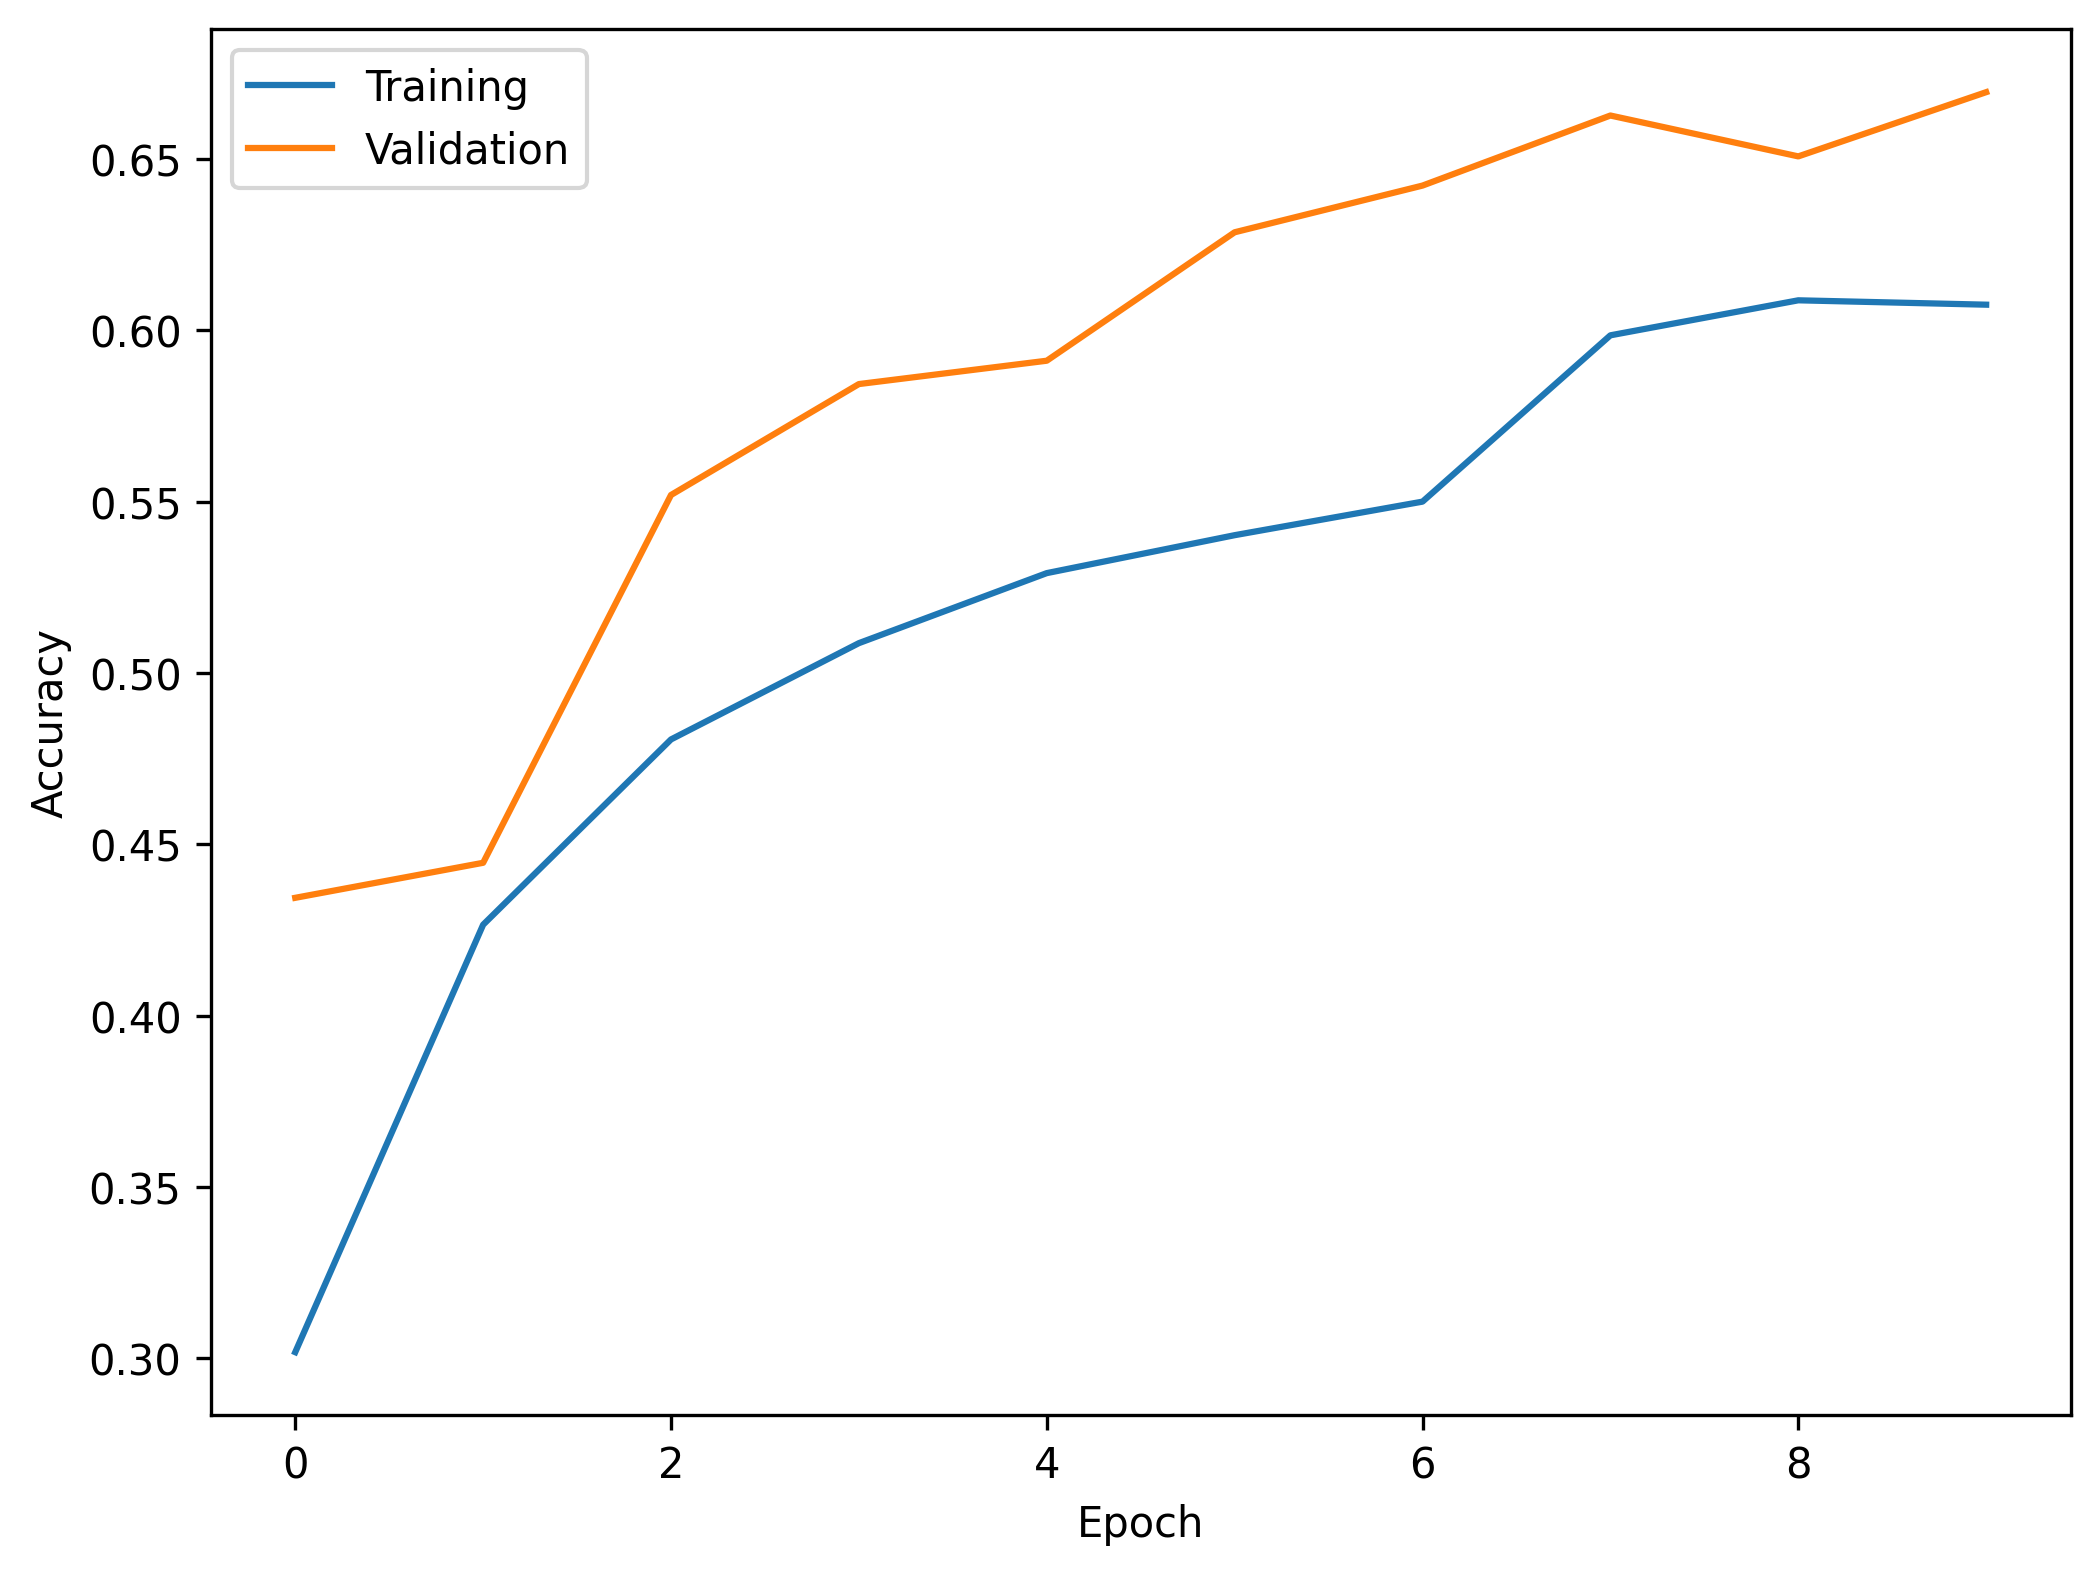

23/23 [==============================] - 2s 62ms/step


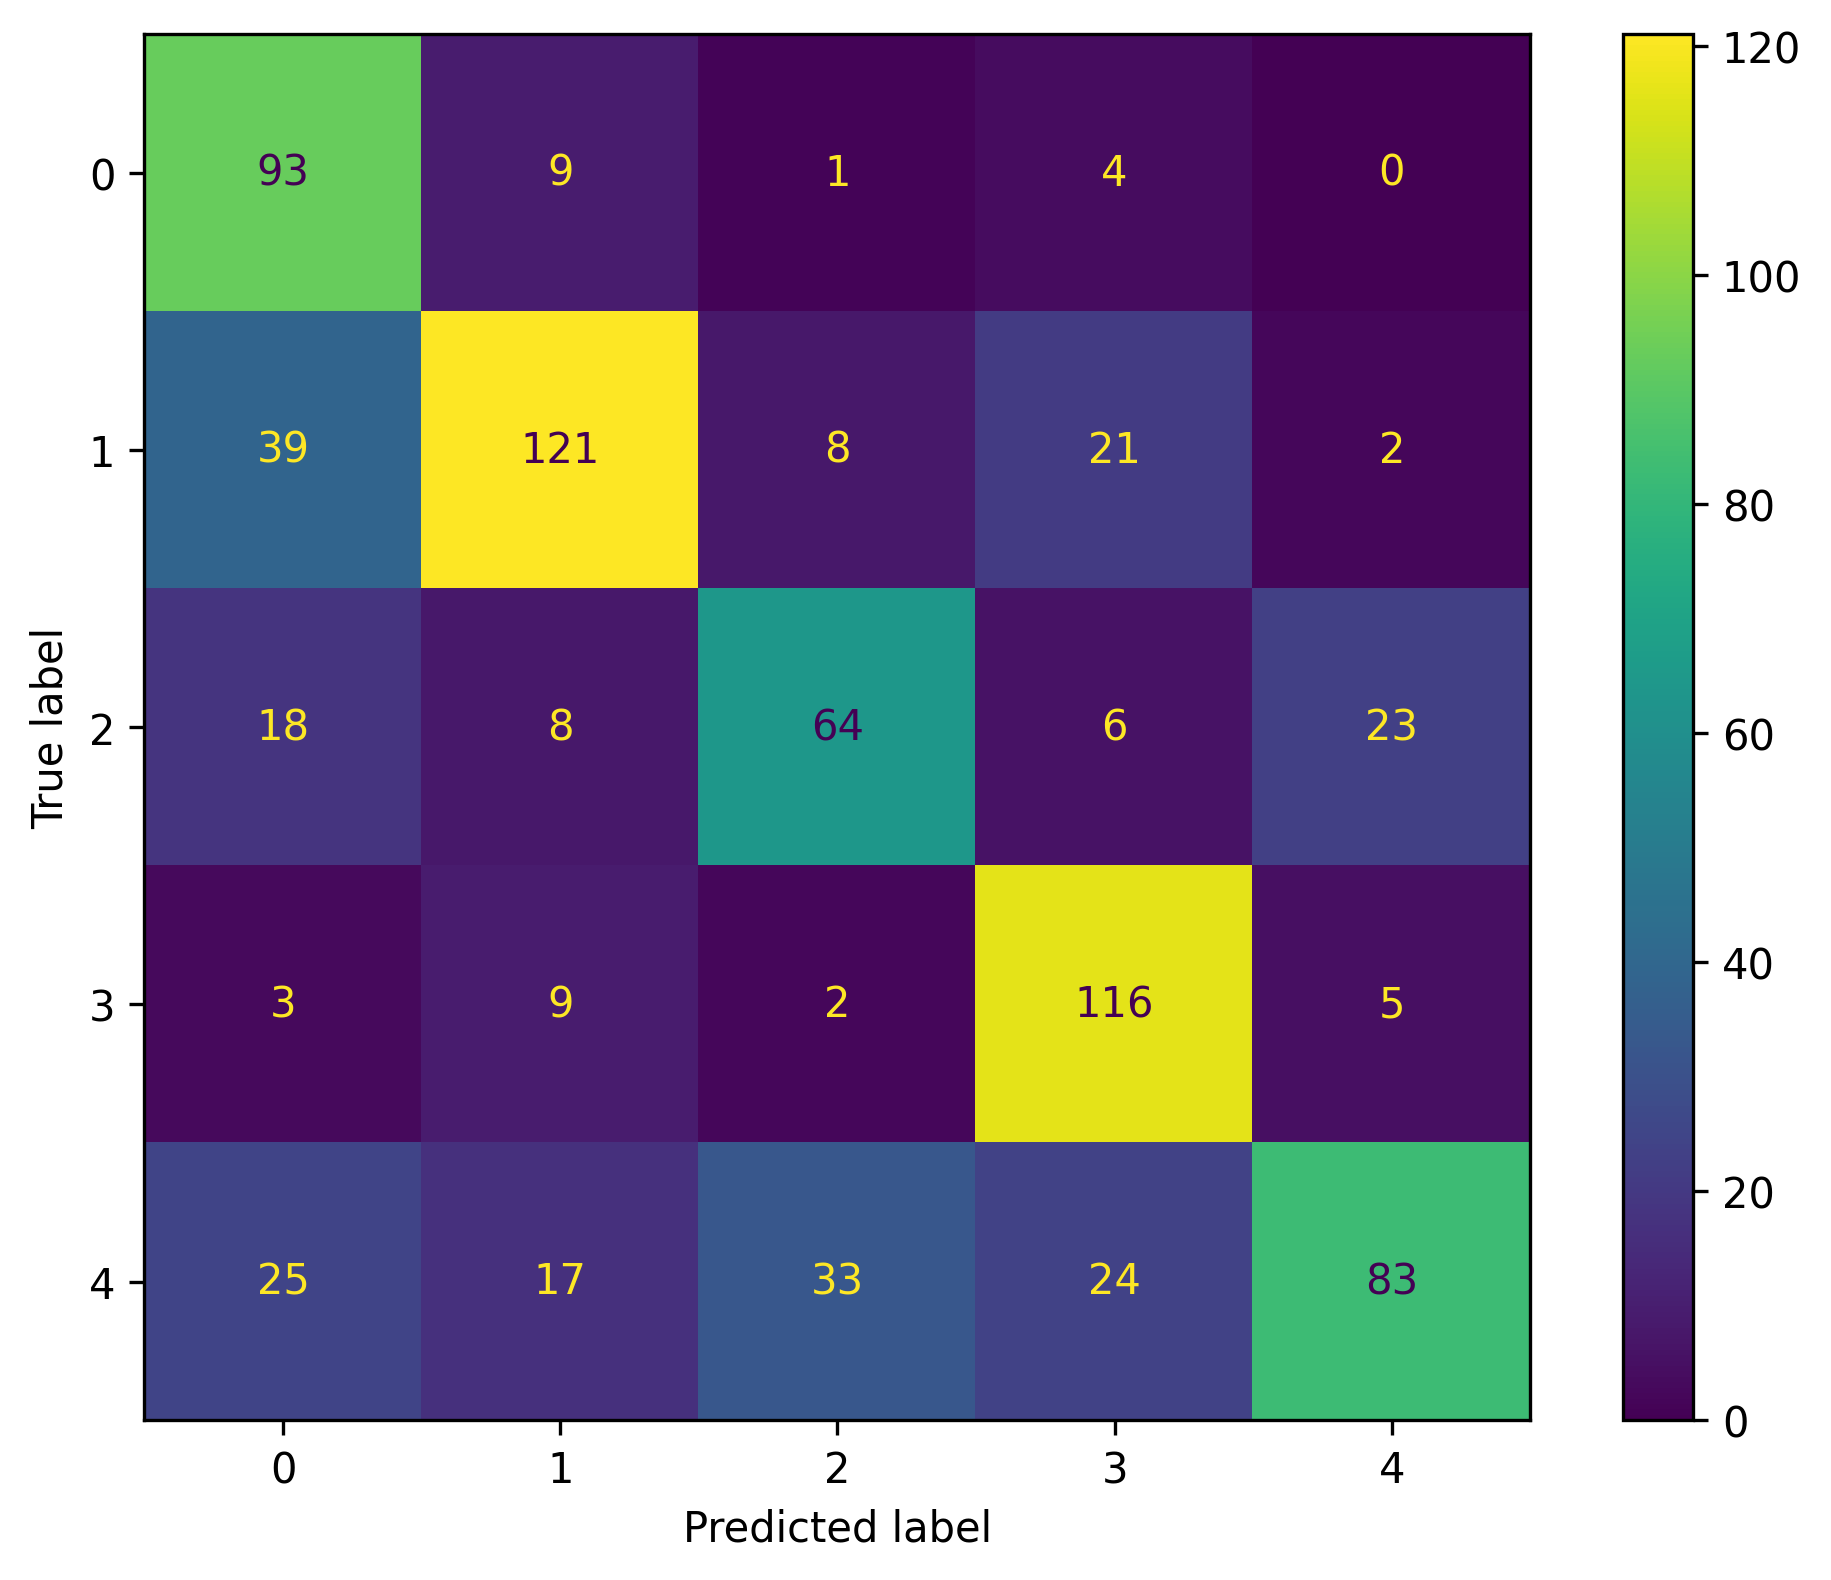

In [37]:
model = Sequential()
# Add the first Convolutional layer.  use 32 filters which will each be convolved with the input data to 
#produce 32 feature maps, a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (3,3), strides = (2, 2), padding= "same", input_shape=(256, 256, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding= "same"))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2),  padding= "same"))

# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding= "same", activation = 'relu'))

# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding= "same"))

# After the final pooling layer, add a flatter layer,
# which will flatten the output to a 1-dimensional array, ready for the fully connected network.
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem,
# use the categorical cross entropy for the
# loss function, and the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128

# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Increase the kernel size to (5x5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)       

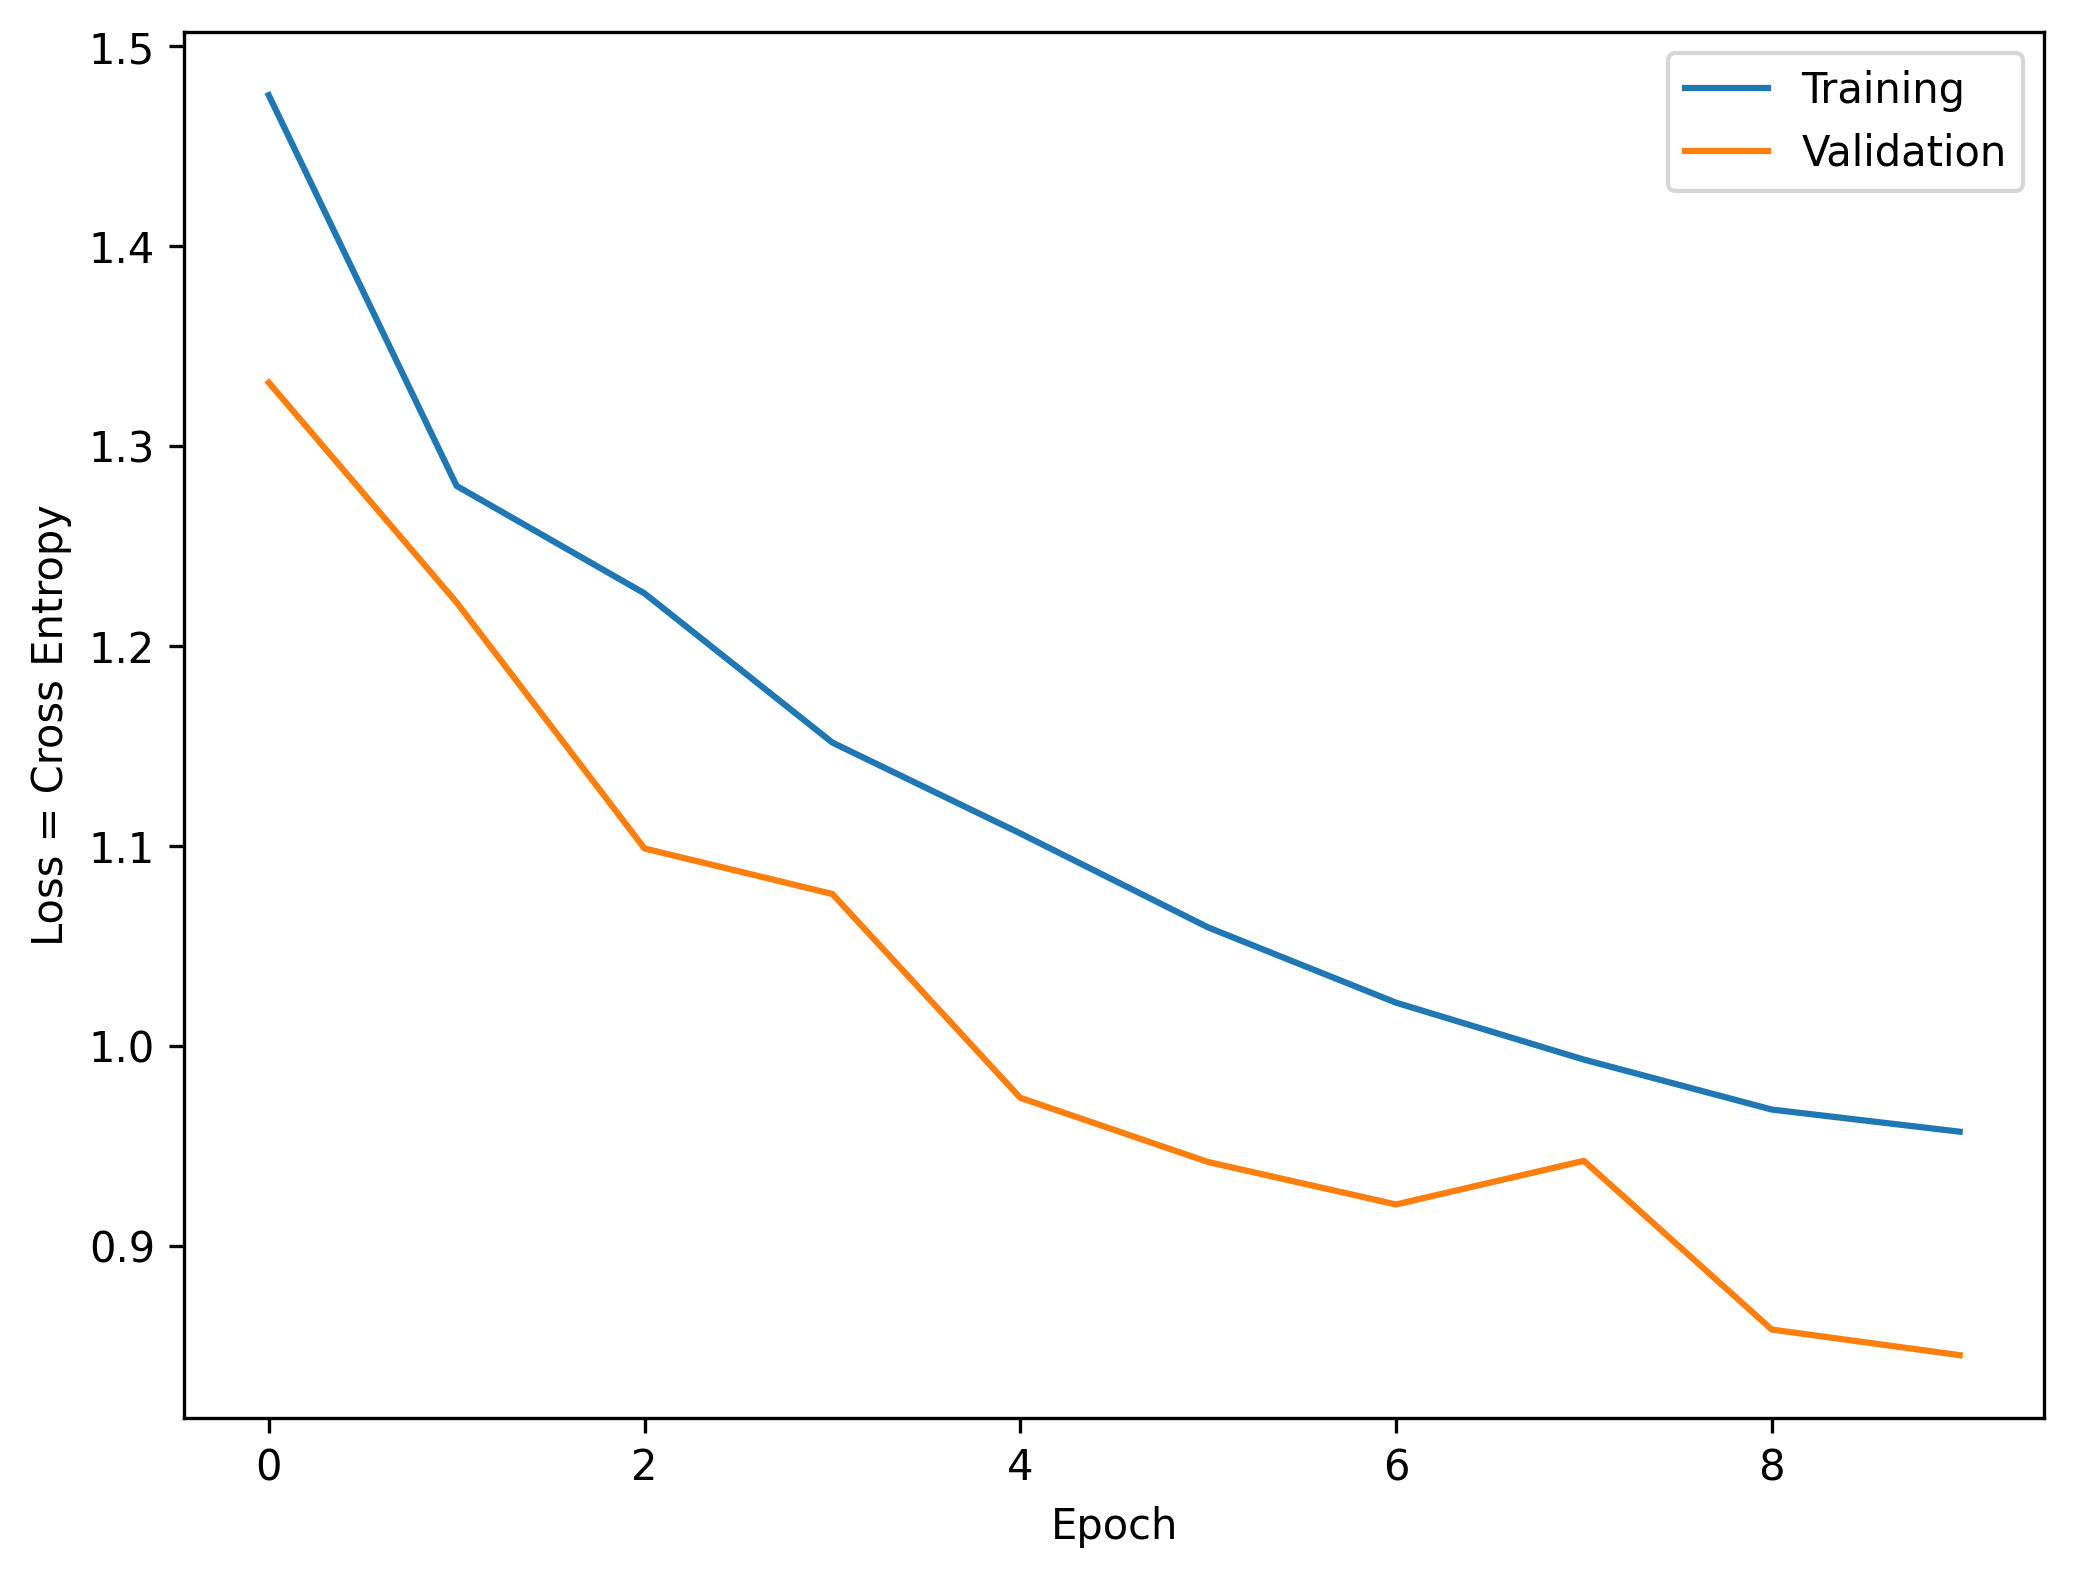

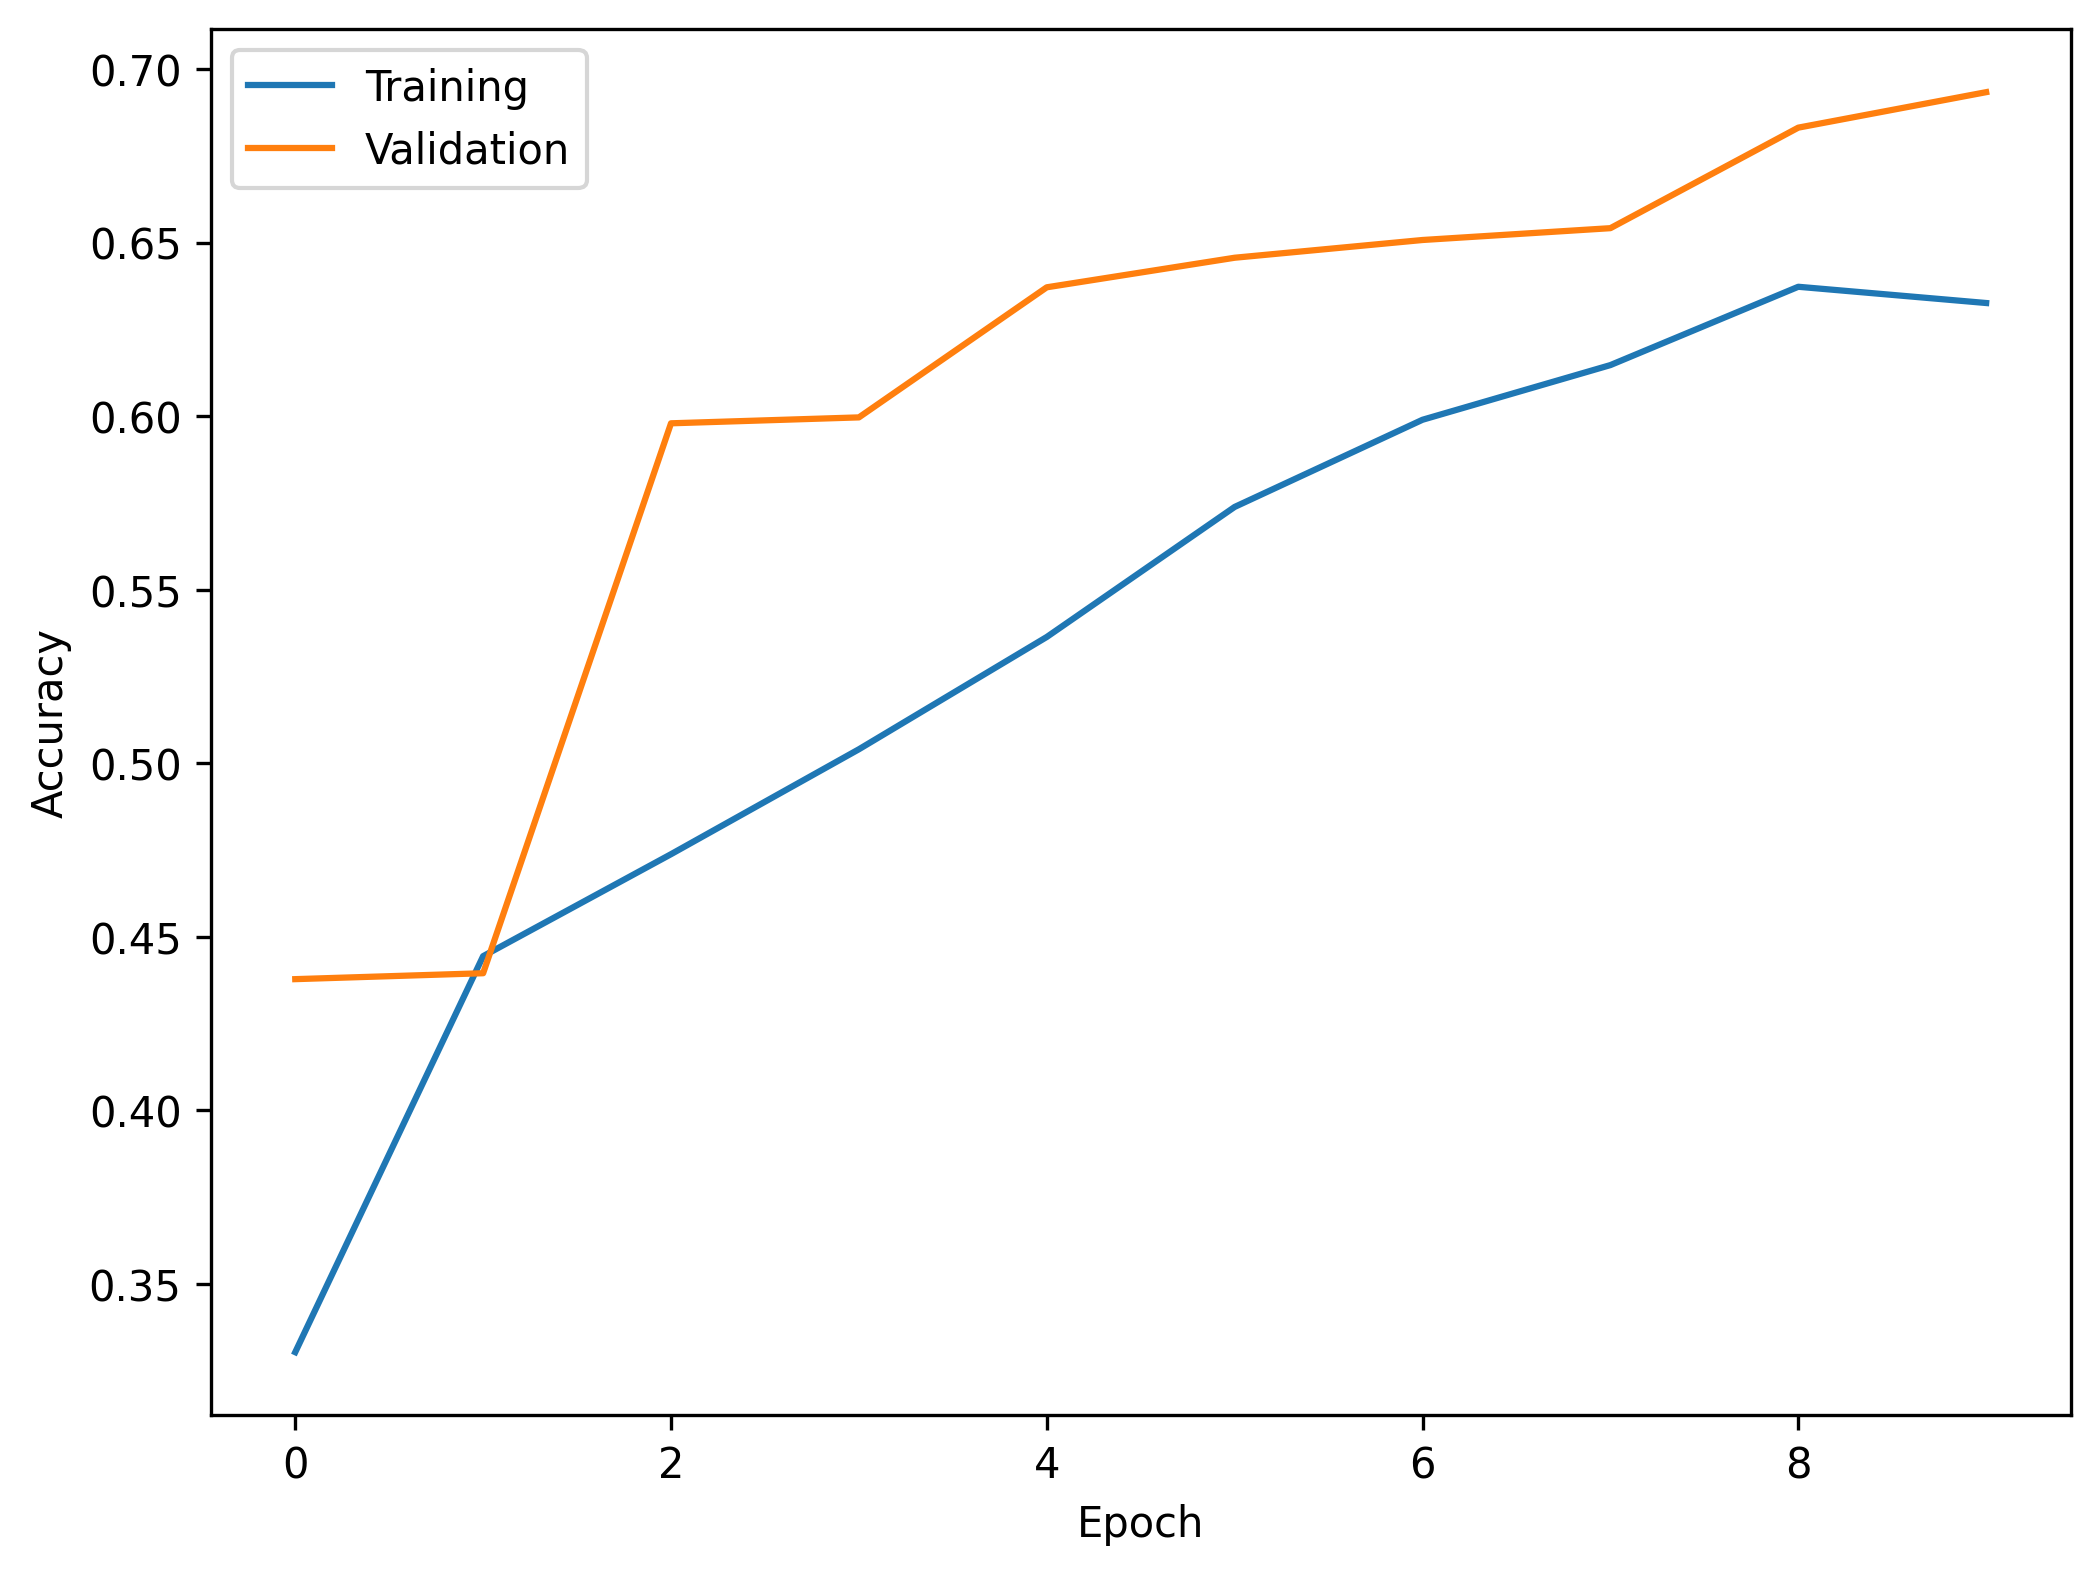

23/23 [==============================] - 2s 77ms/step


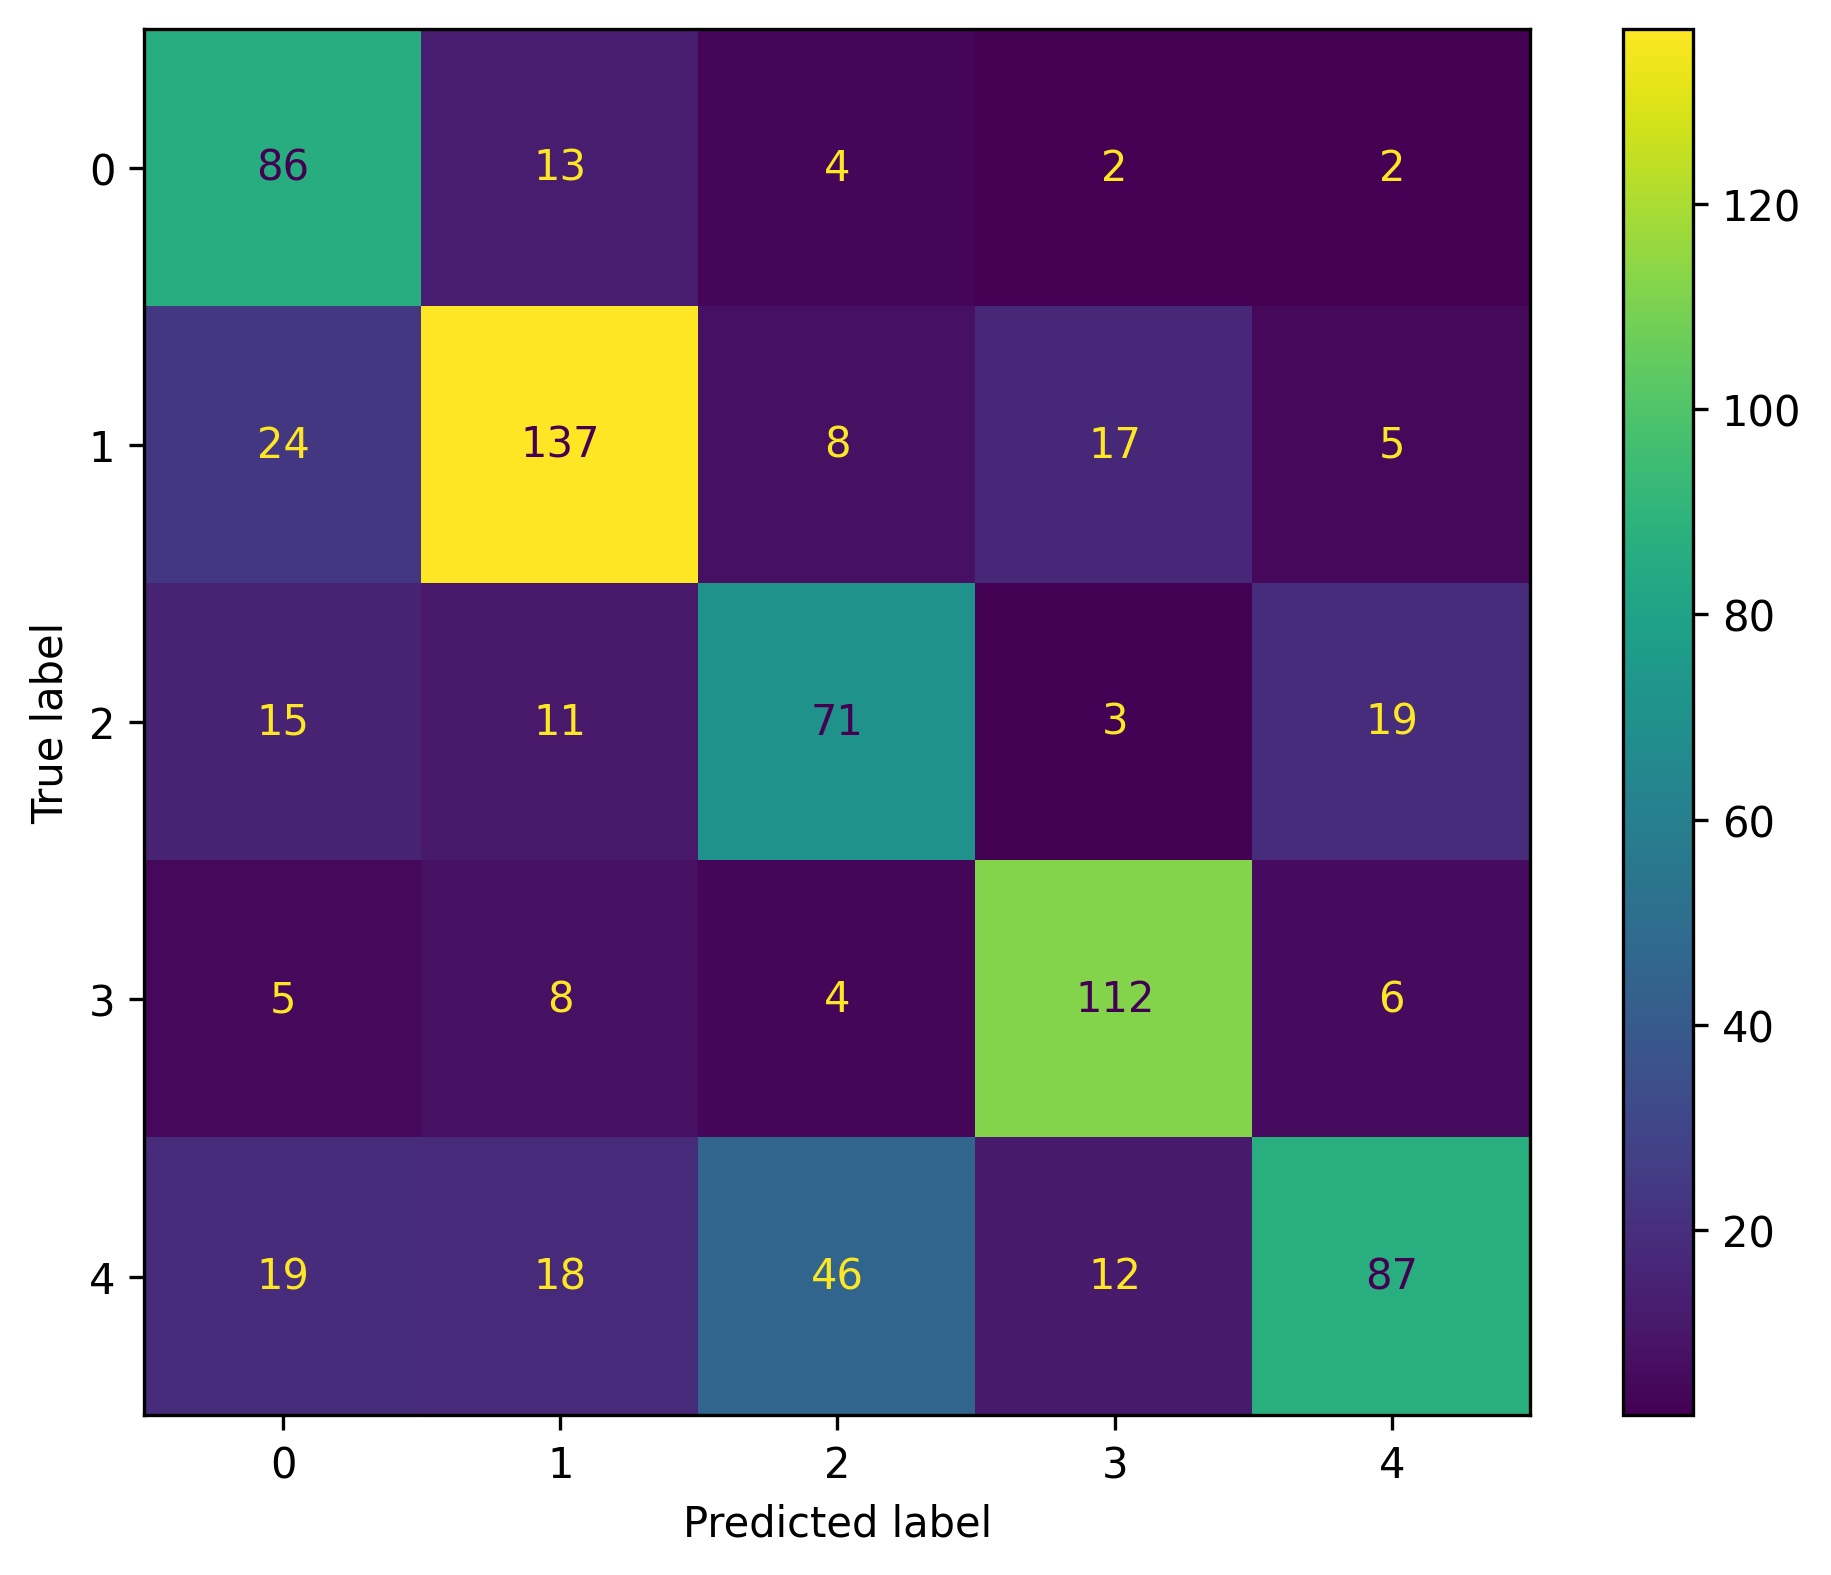

In [38]:
model = Sequential()
# Add the first Convolutional layer. use 32 filters which will each be convolved with the input data to 
#produce 32 feature maps. use a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (5,5), strides = (2, 2), padding= "same", input_shape=(256, 256, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2), padding= "same"))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2),  padding= "same"))

# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (5, 5),strides = (2, 2), padding= "same", activation = 'relu'))

# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2), padding= "same"))

# After the final pooling layer, add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem,
# use the categorical cross entropy for the
# loss function, and the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128
# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Replace MaxPooling with Average Pooling

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 64, 64, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 average_pooling2d_2 (Averag  (None, 4, 4, 128)       

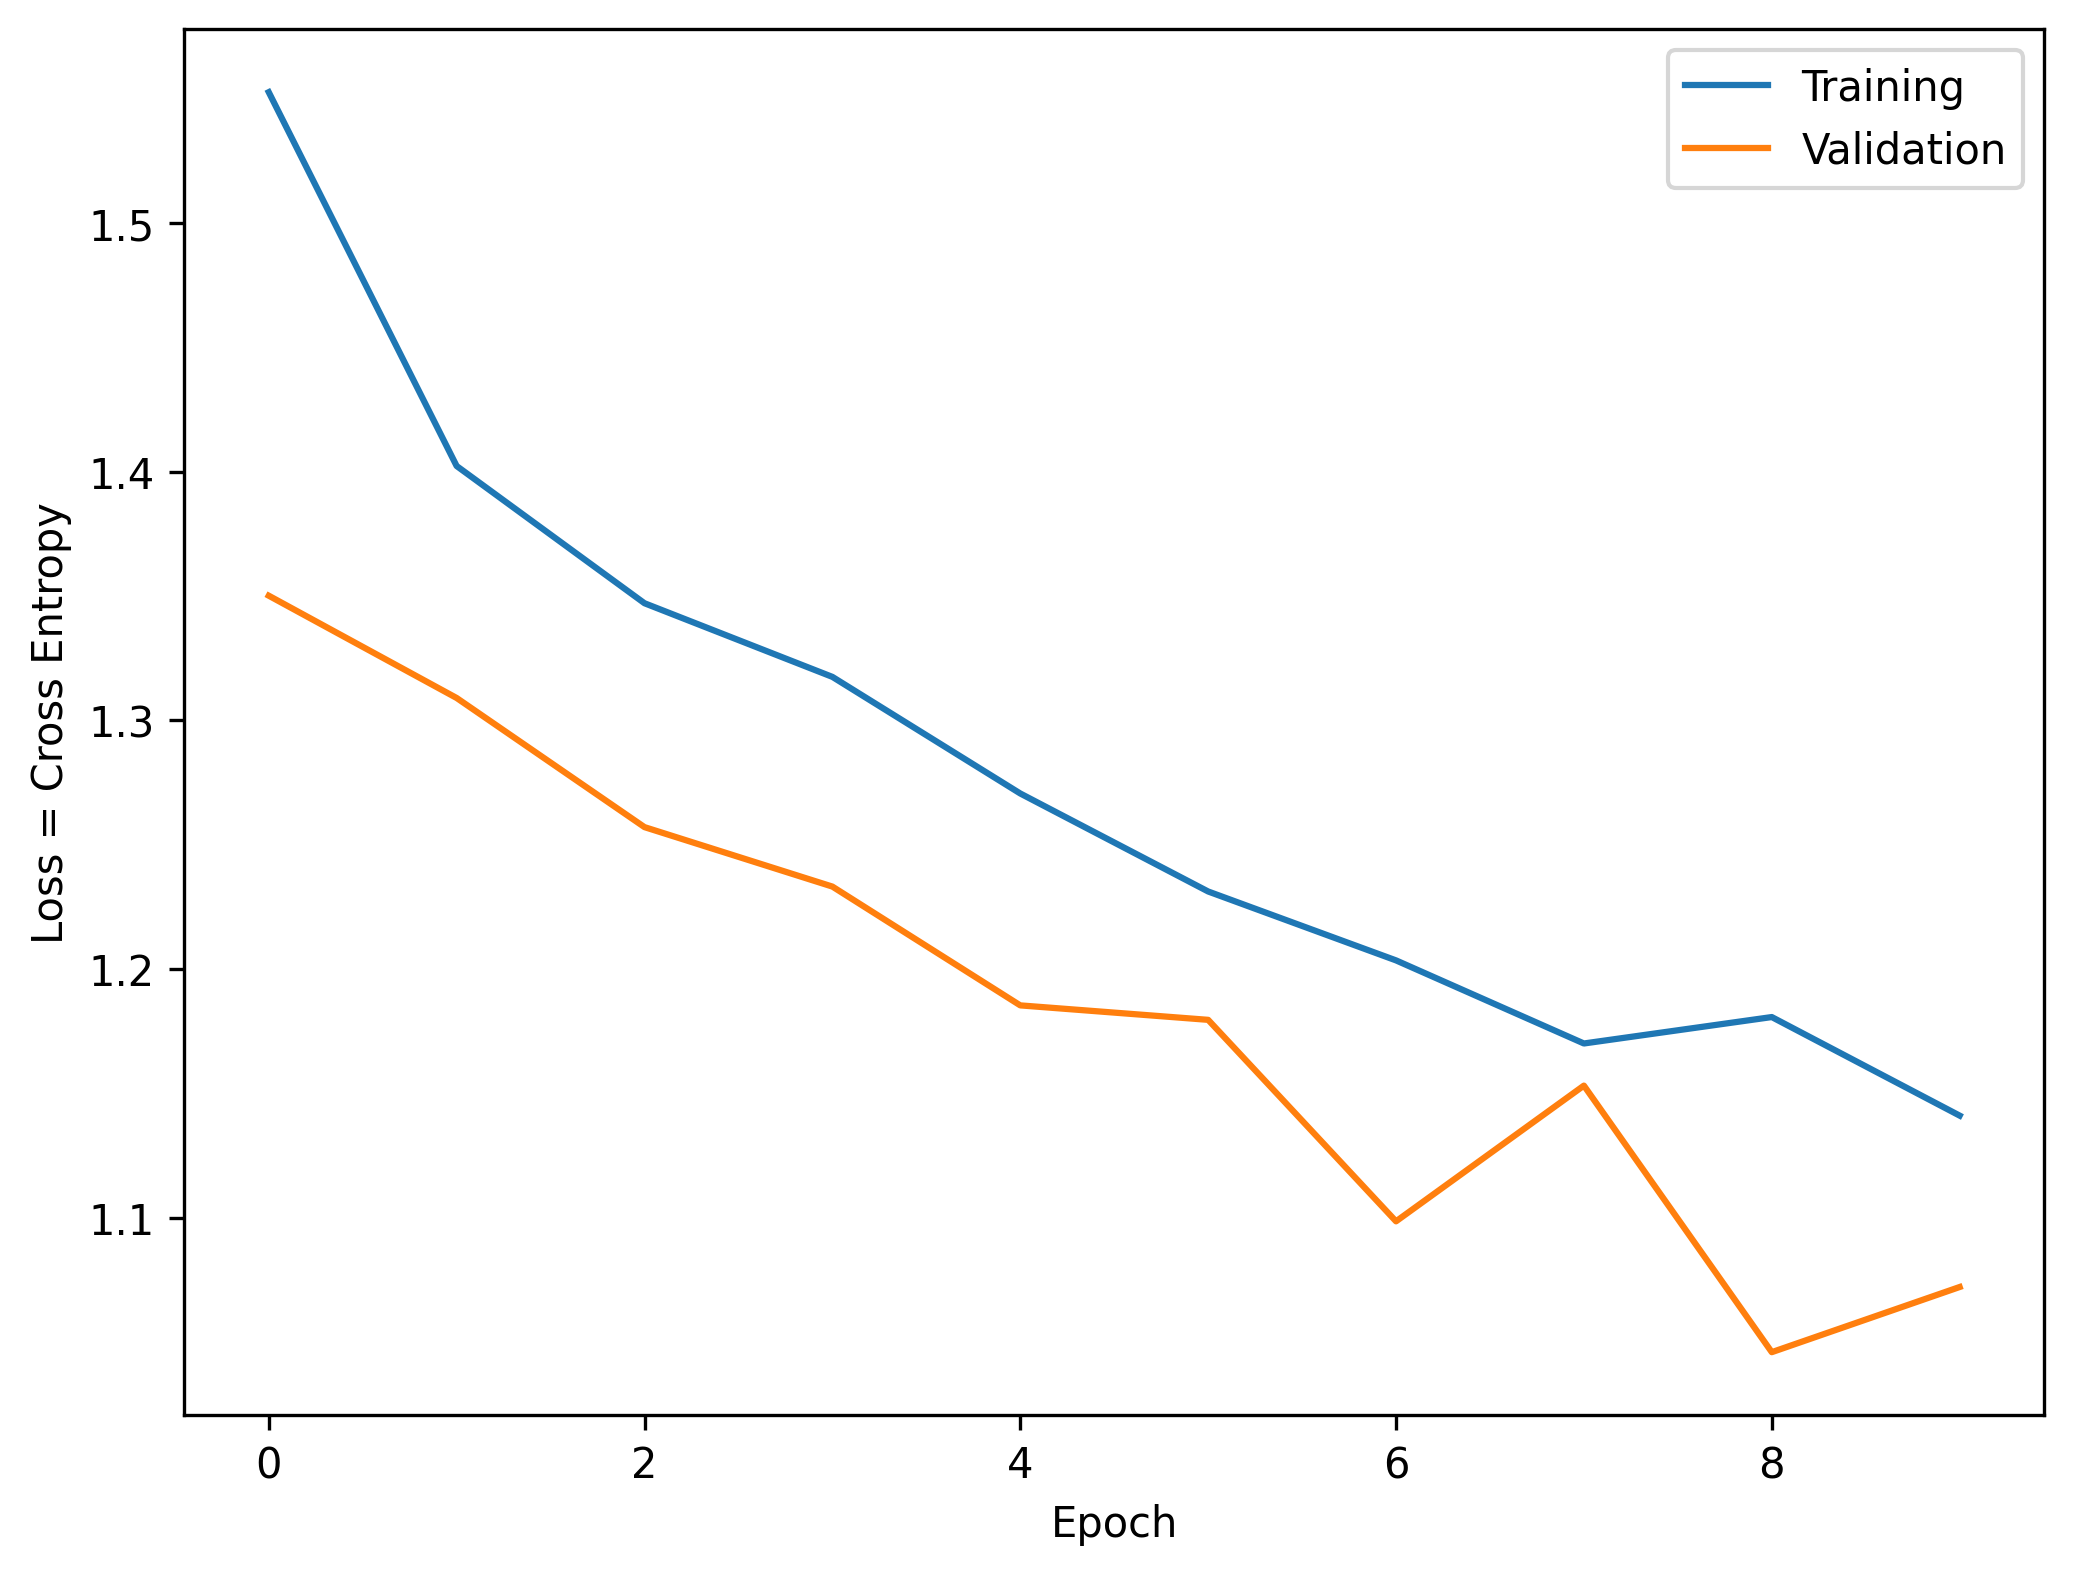

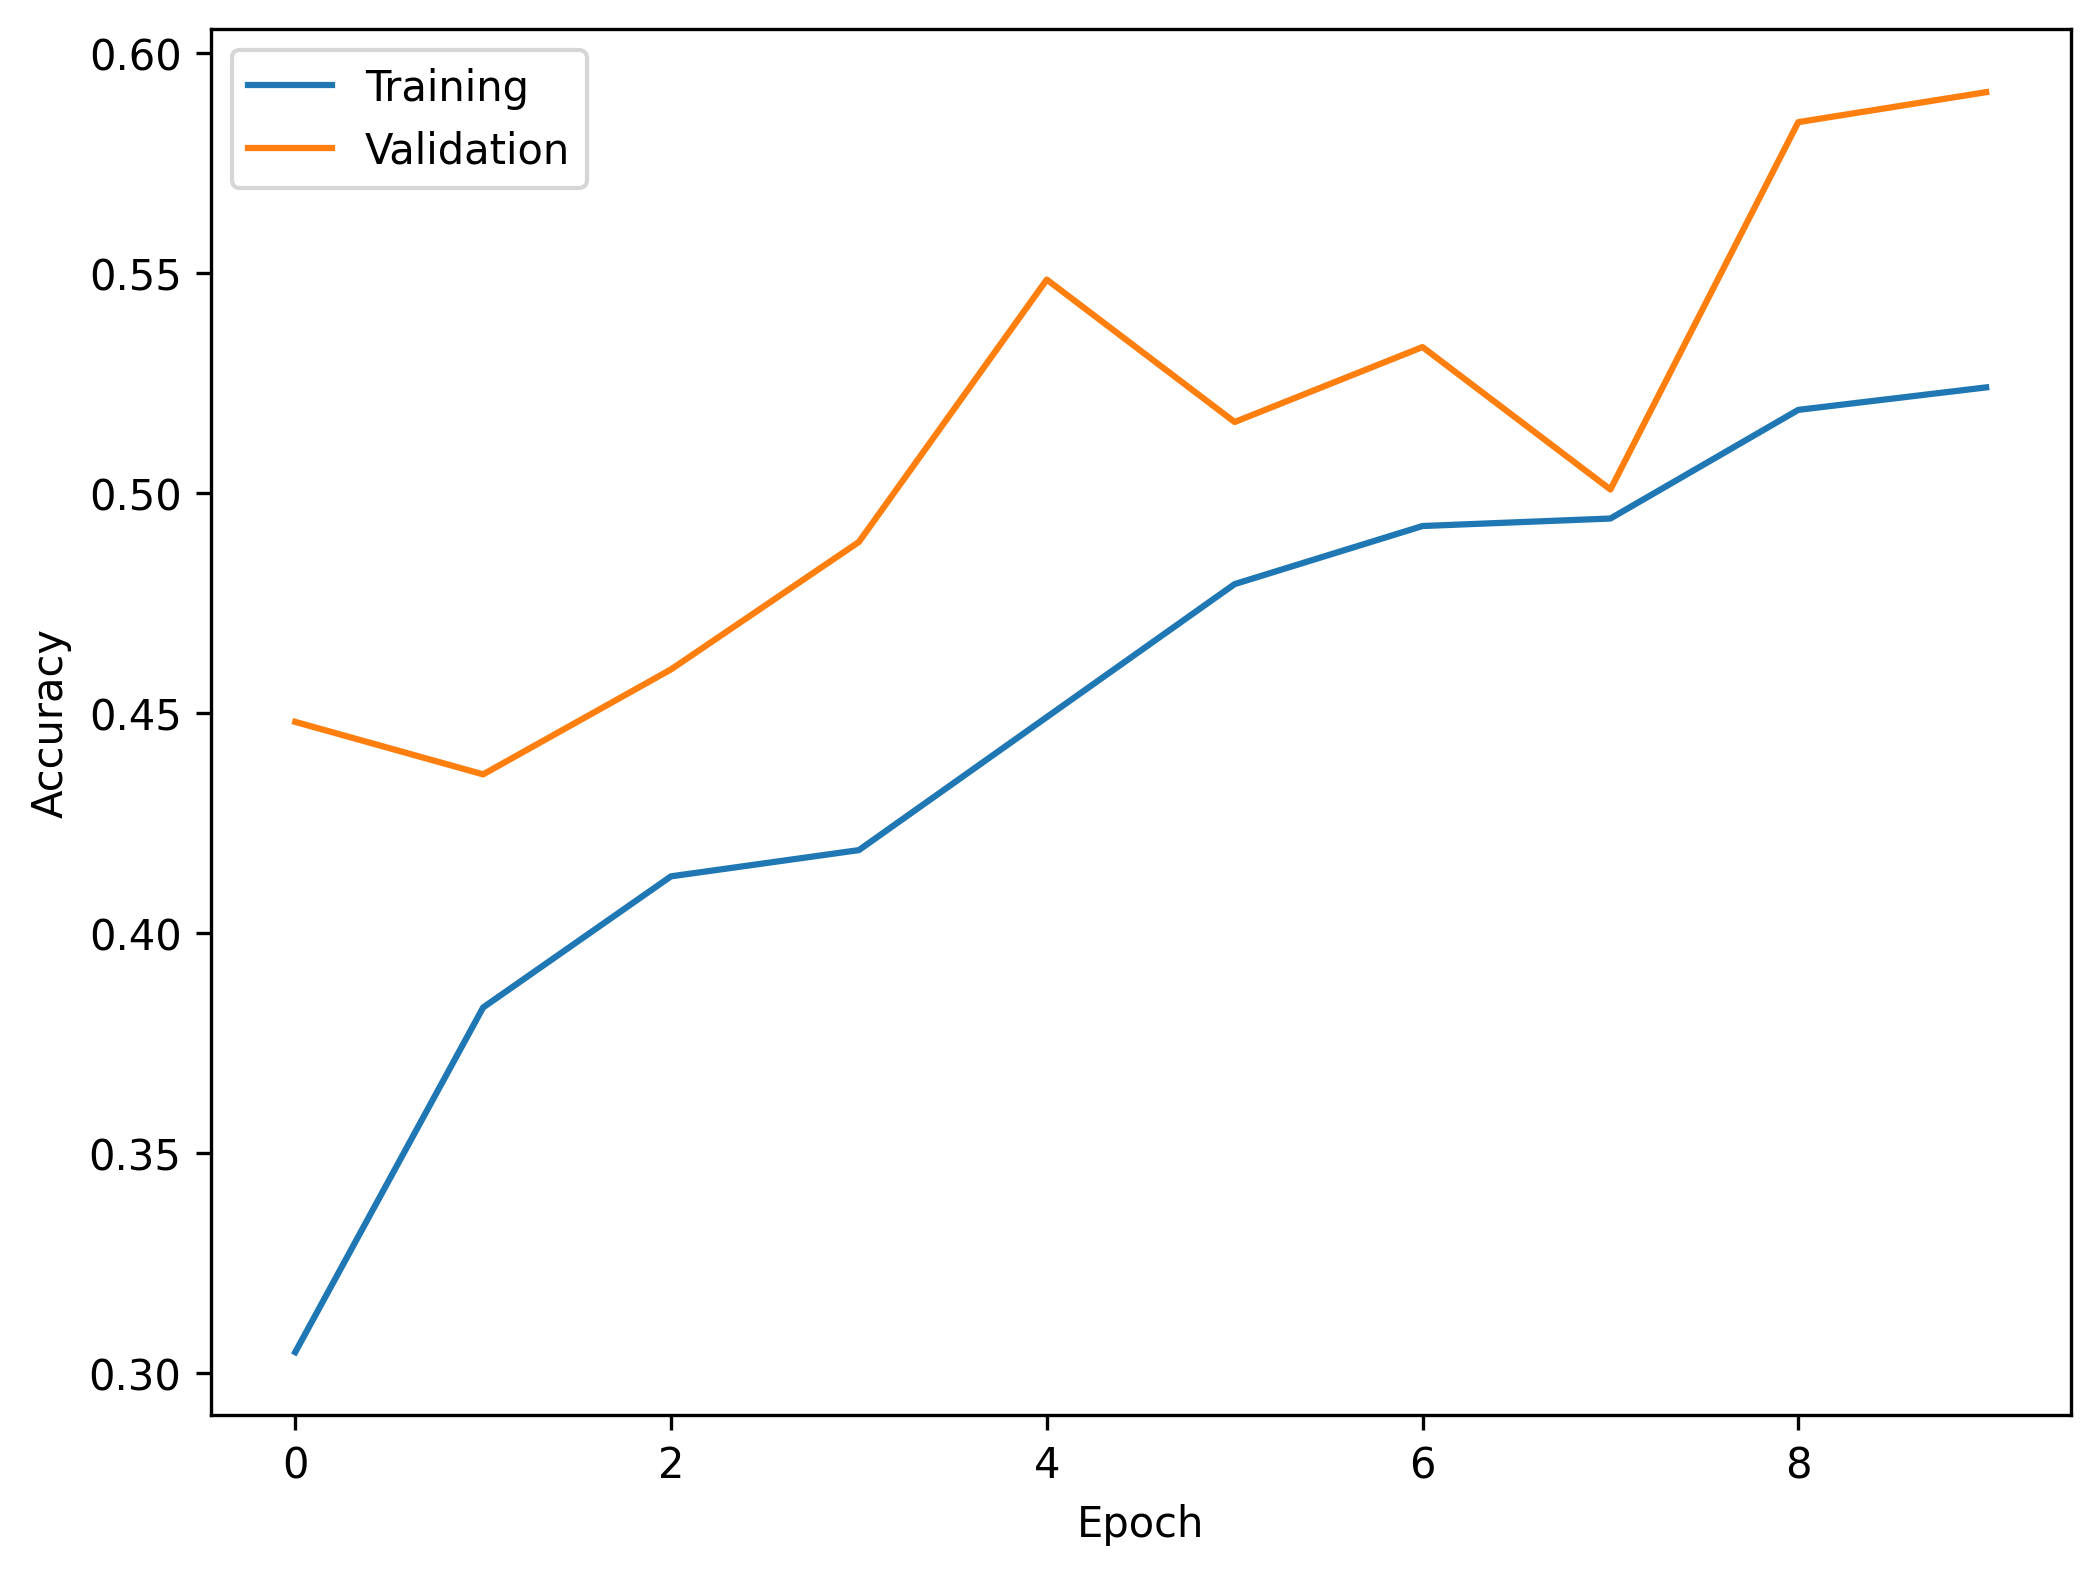

23/23 [==============================] - 2s 74ms/step


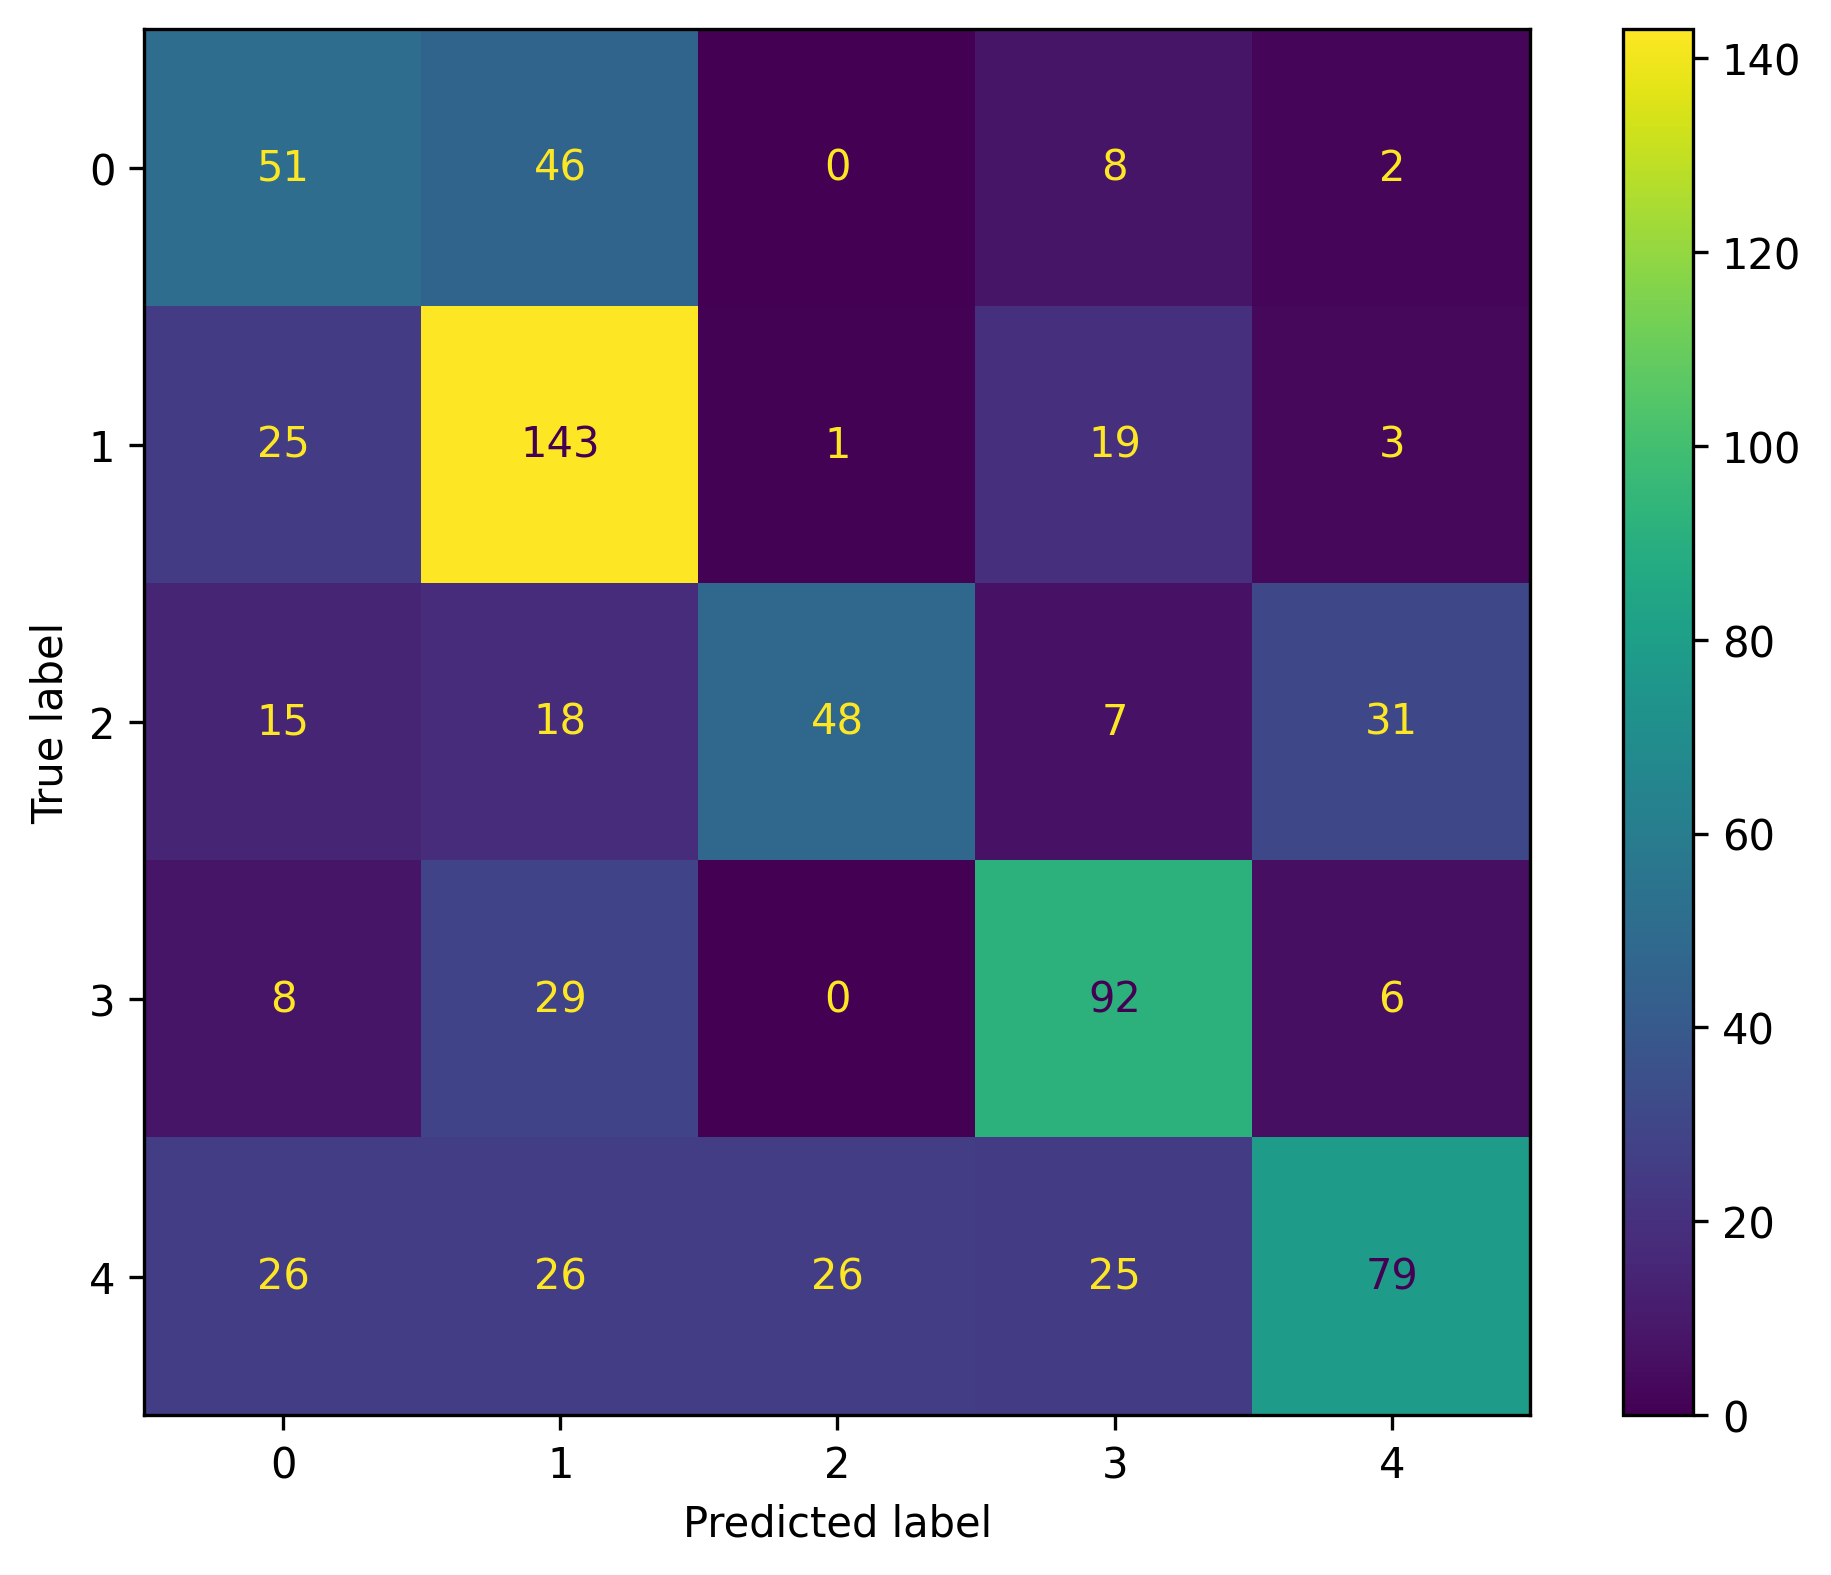

In [39]:
#import the AveragePooling2D layer from Keras.
from tensorflow.keras.layers import AveragePooling2D
model = Sequential()

# Add the first Convolutional layer.use 32 filters which will each be convolved with the input data to 
#produce 32 feature maps.  use a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (5,5), strides = (2, 2), padding= "same", input_shape=(256, 256, 3), activation = 'relu'))

# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2),  padding= "same"))

# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (5, 5),strides = (2, 2), padding= "same", activation = 'relu'))

# Add a third max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))

# After the final pooling layer, add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem,
# use the categorical cross entropy for the
# loss function, and  use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128

# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

#  Introduce Batch Normalisation

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 average_pooling2d_3 (Averag  (None, 64, 64, 32)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 average_pooling2d_4 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                      

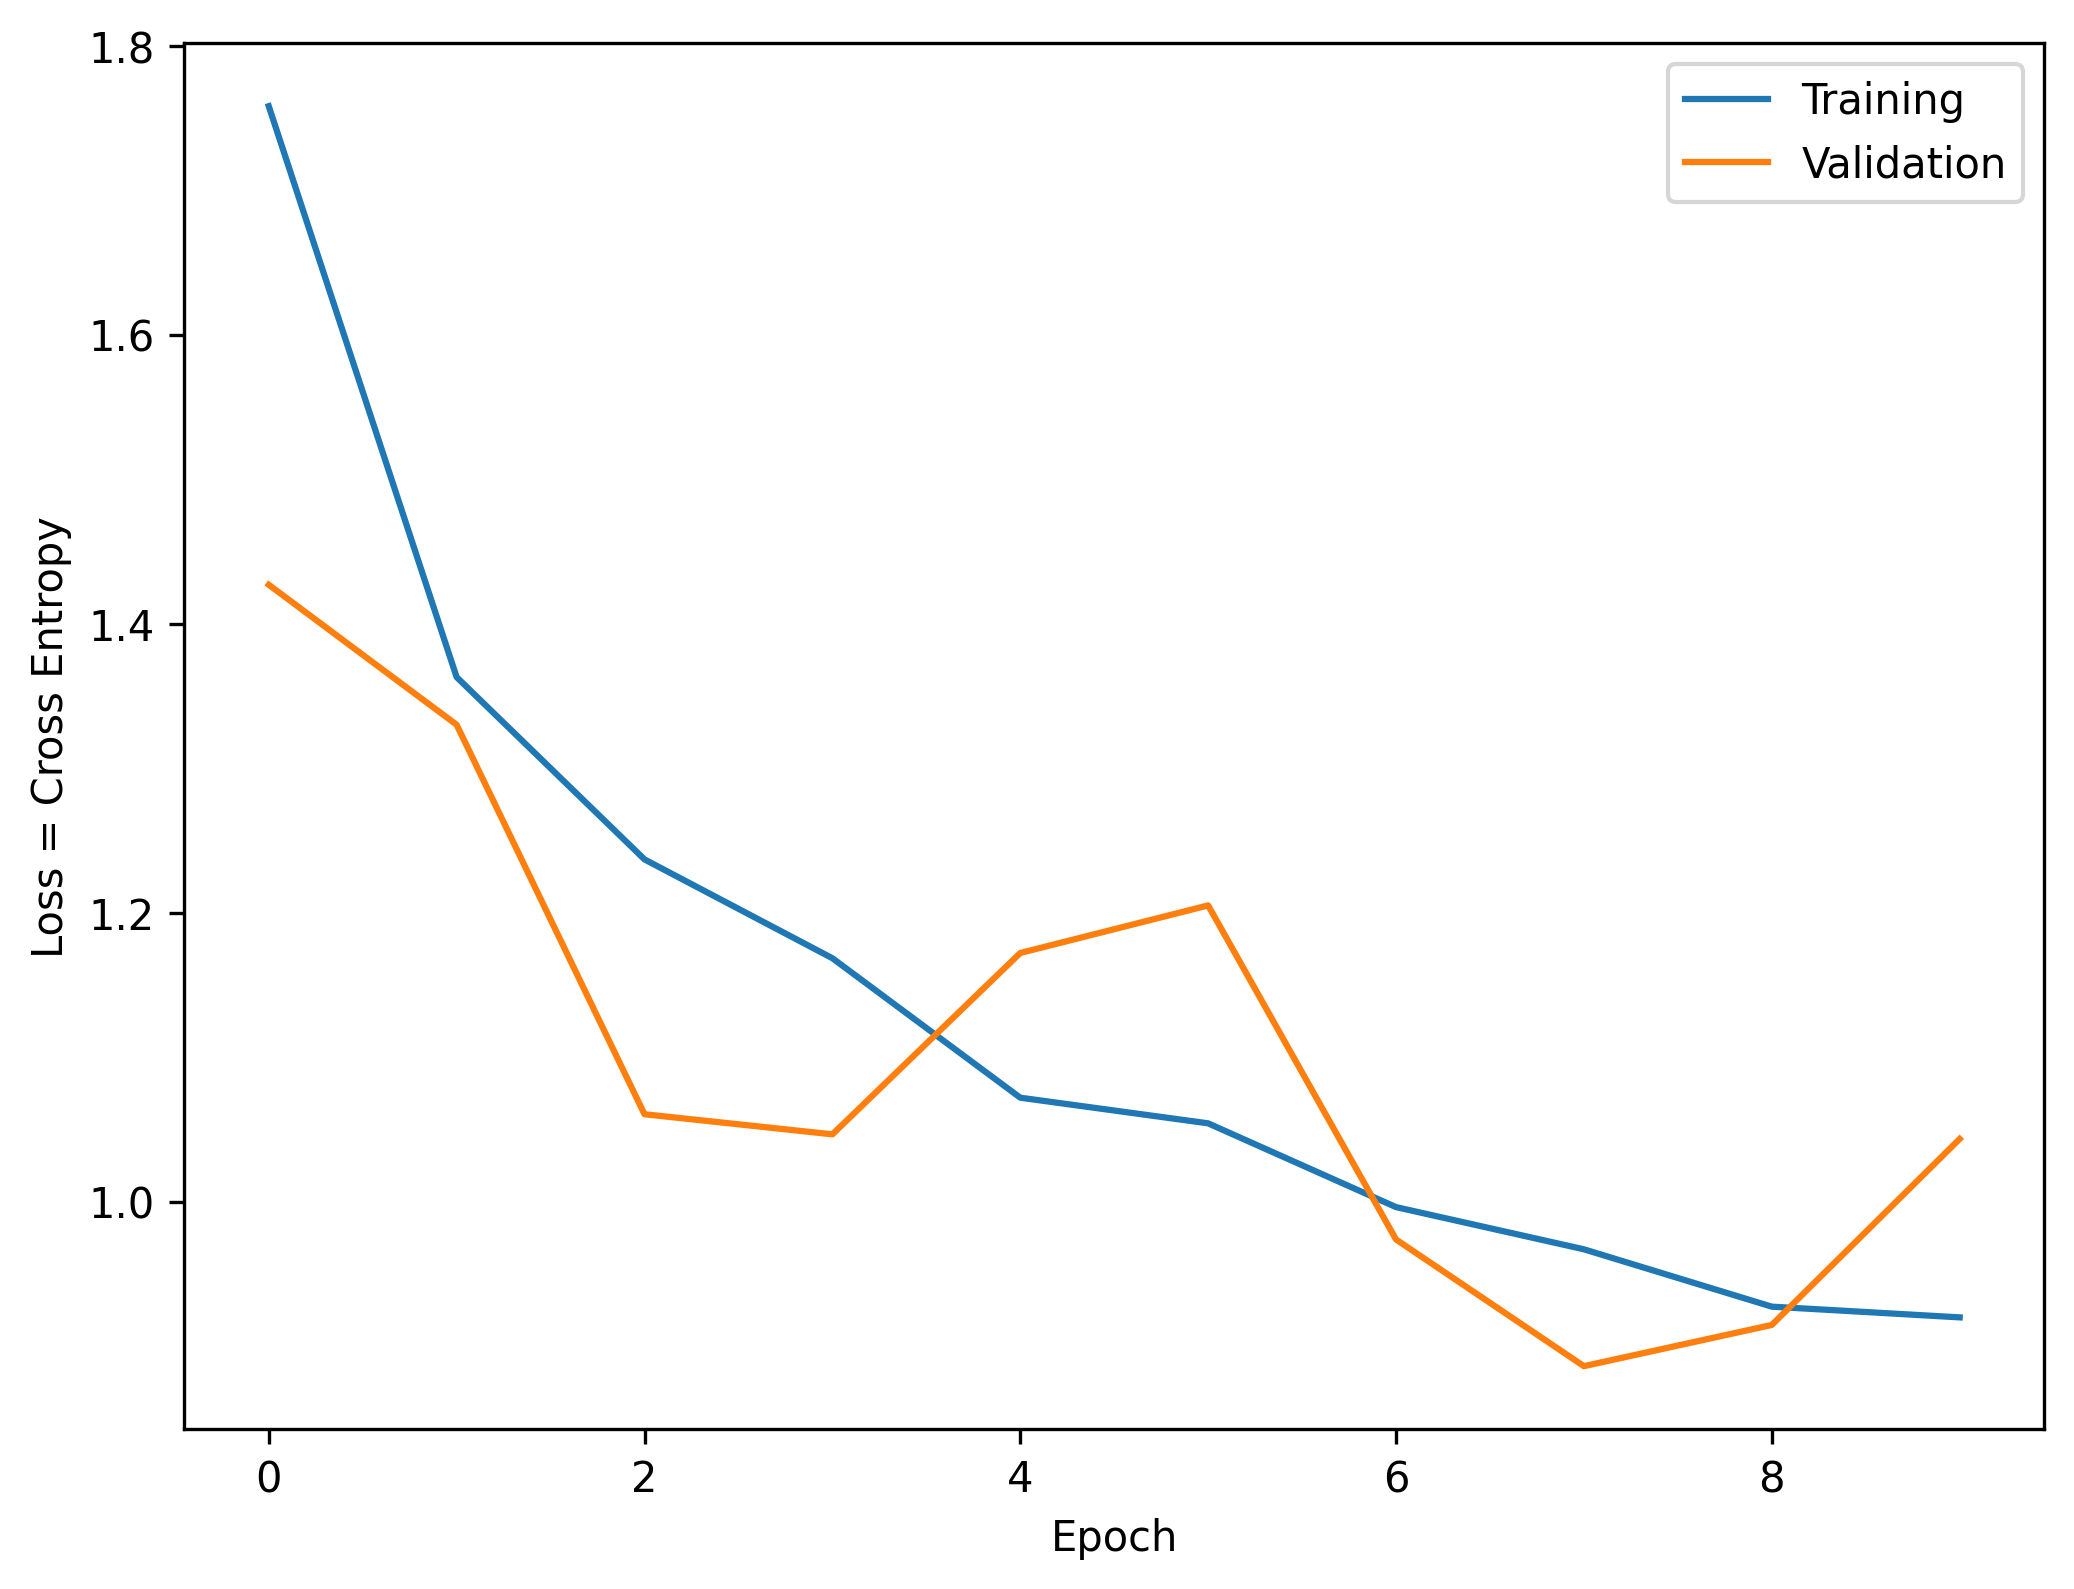

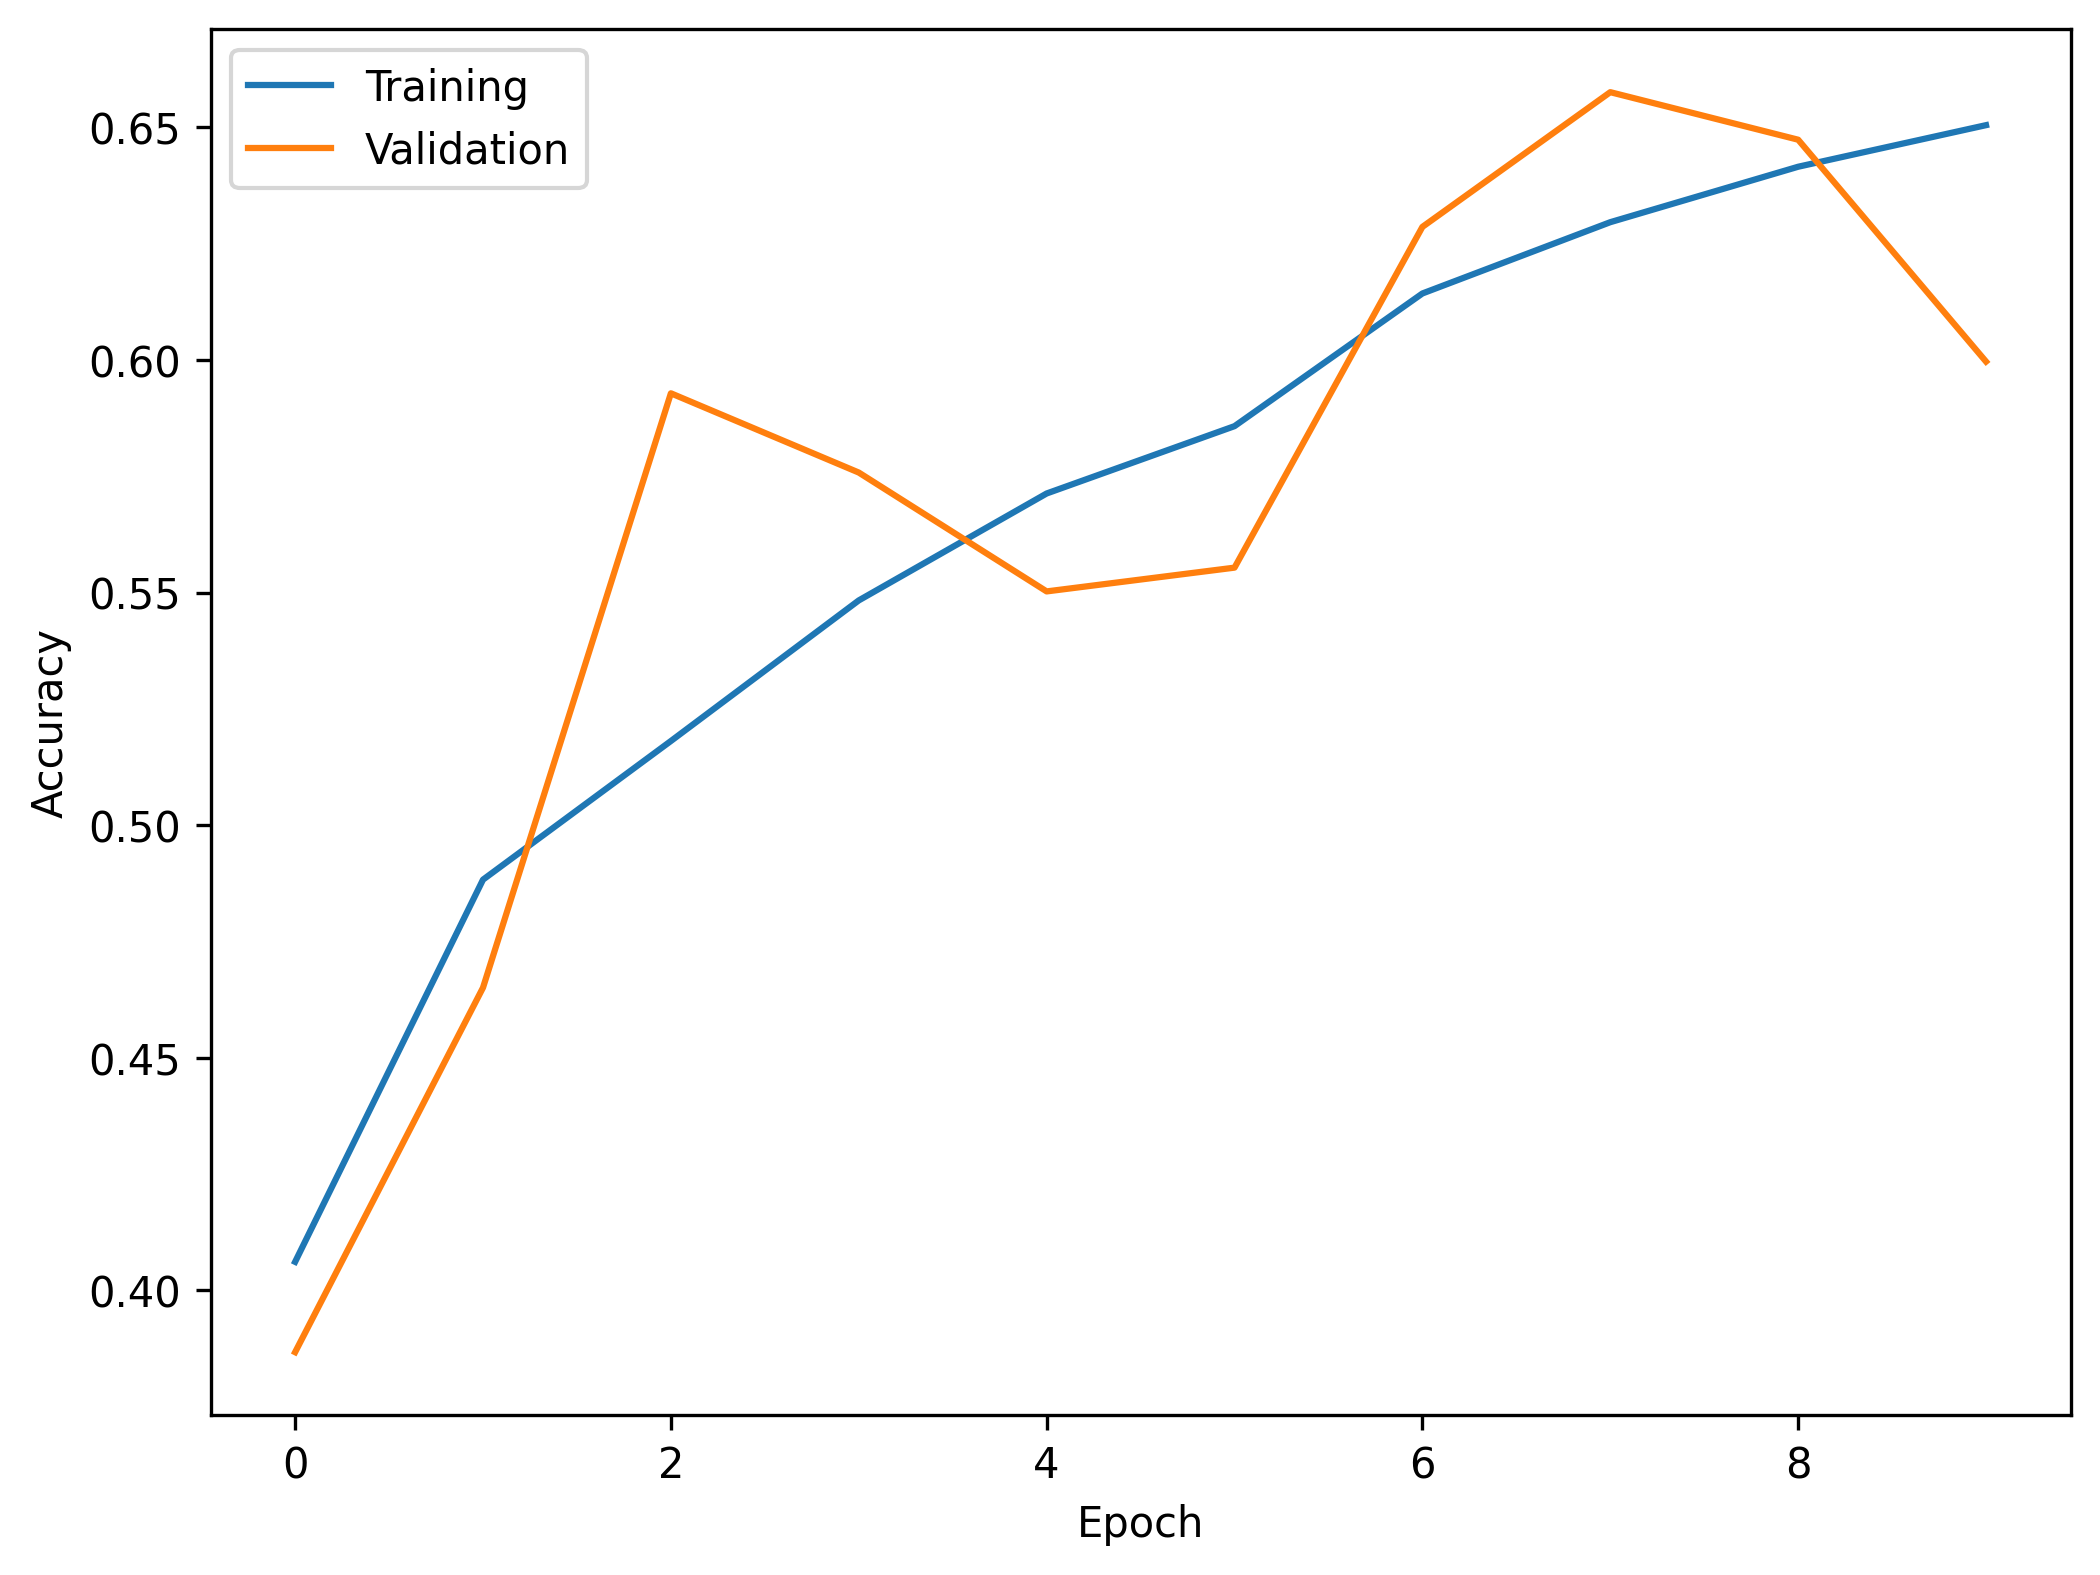

23/23 [==============================] - 2s 78ms/step


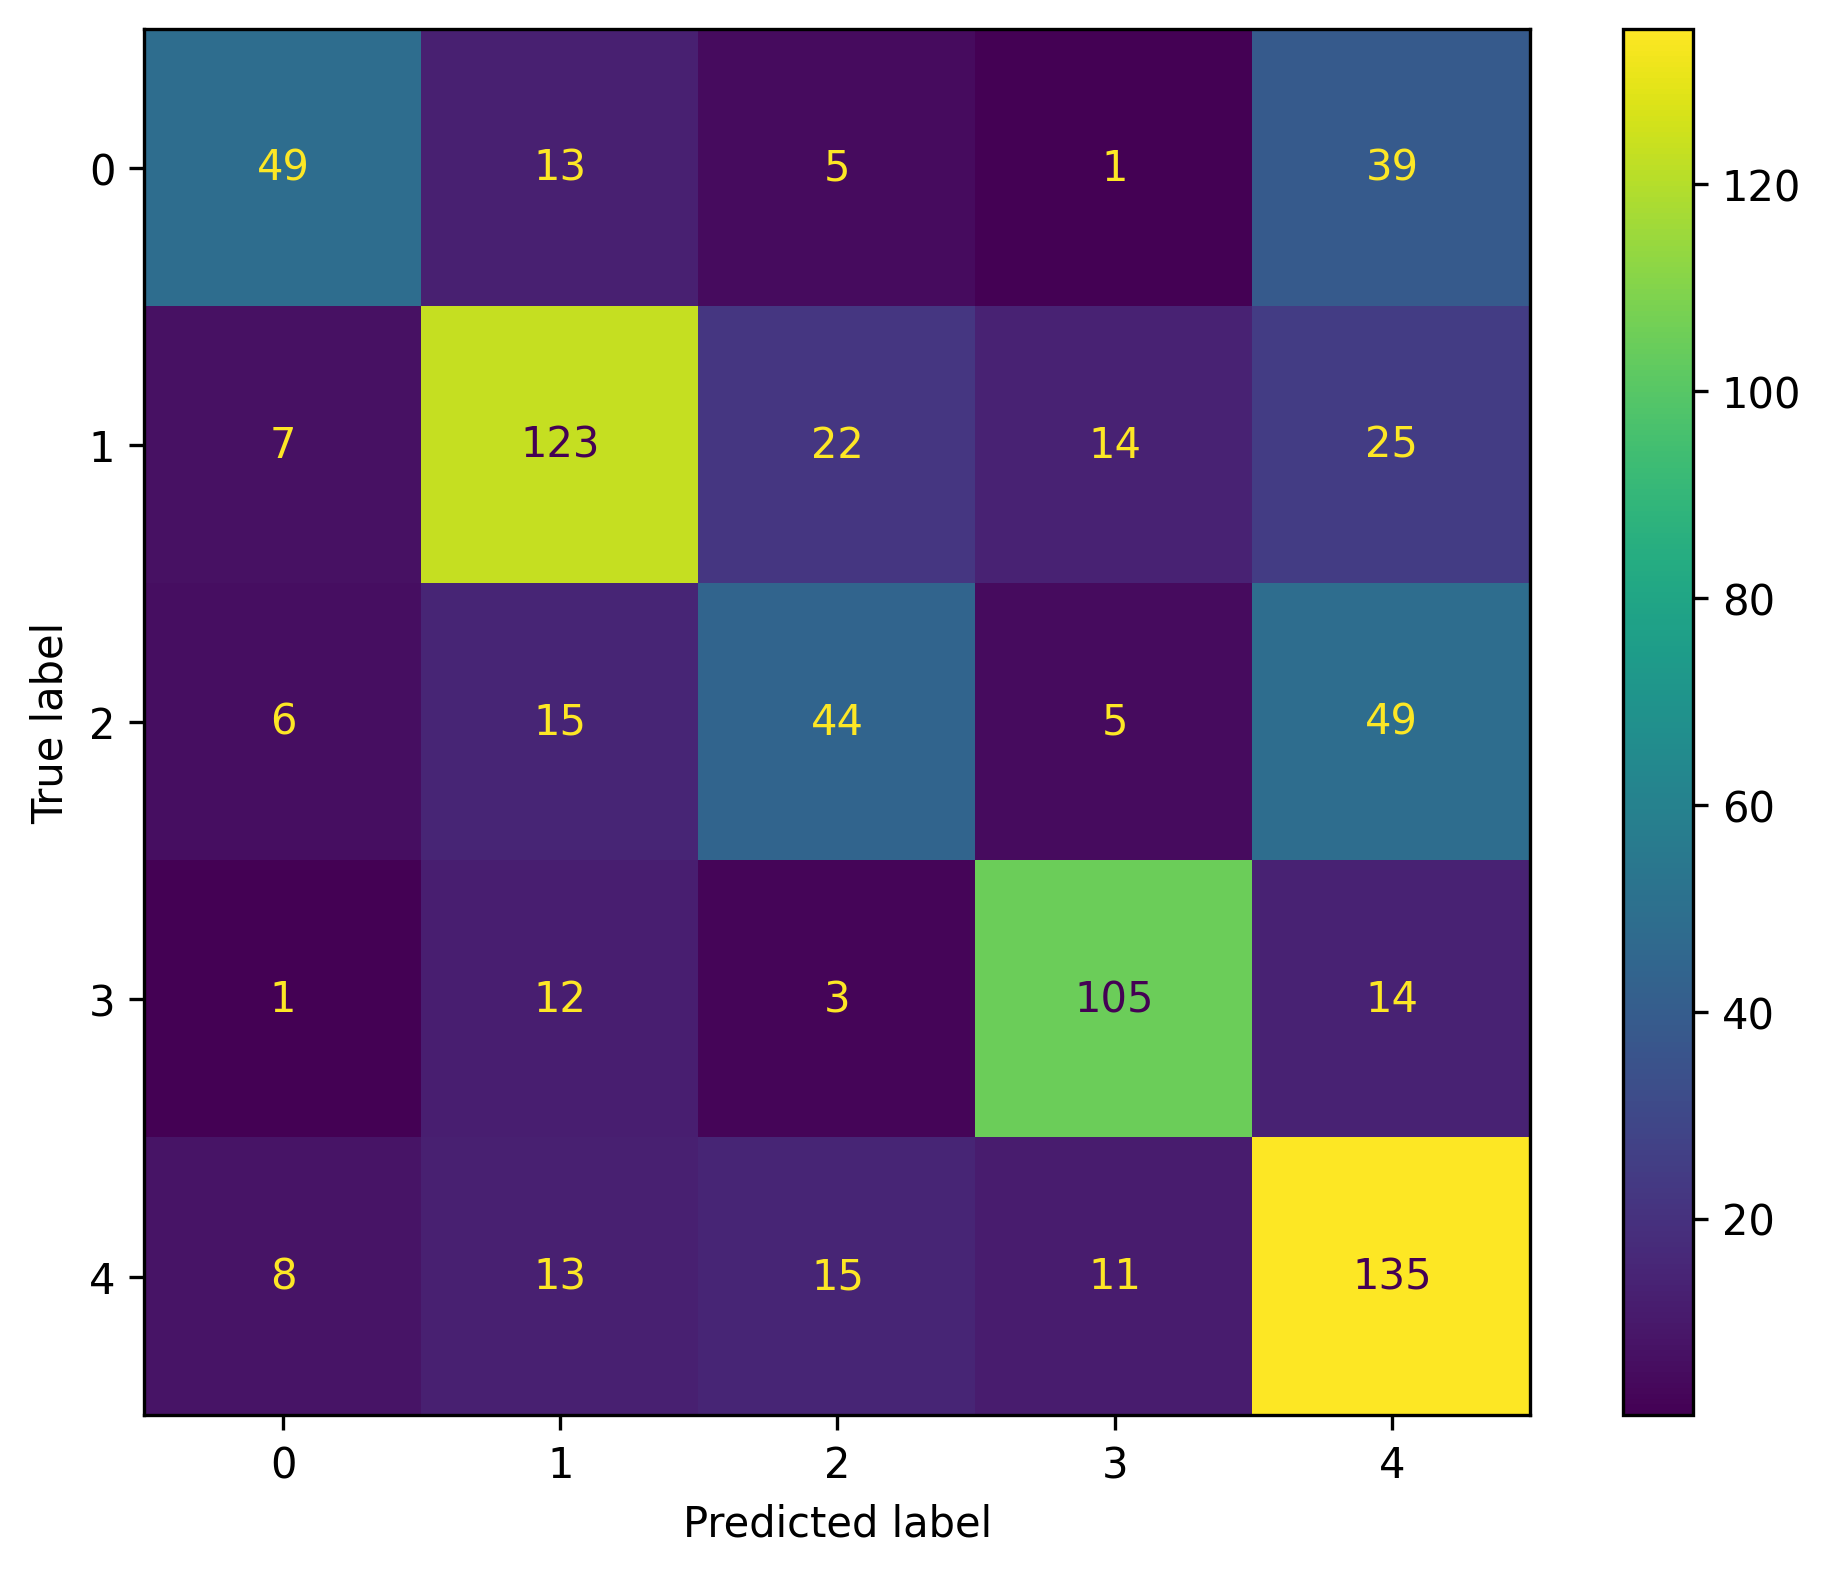

In [41]:
# import the BatchNormalization layer from Keras.
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
# Add the first Convolutional layer.  use 32 filters which will each be convolved with the input data to 
#produce 32 feature maps. use a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (5,5), strides = (2, 2), padding= "same", input_shape=(256, 256, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))

# Apply Batch normalisation to the pooling layer. In this
# set the momentum parameter to 0.9. If it is too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
          
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2),  padding= "same"))

# Apply Batch normalisation to the pooling layer. In this
#  set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
          
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (5, 5),strides = (2, 2), padding= "same", activation = 'relu'))
# Add a third max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))
# After the final pooling layer,add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
          
# Apply Batch normalisation to the pooling layer. In this
# set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
model.add(Flatten())

# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))

# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))

# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))

# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.001)

# Compile the model. As this is a classification problem,
#use the categorical cross entropy for the
# loss function, and use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128

# Fit the model, and record the history of the fit.
# train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Reduce the learning rate from 0.001 to 0.01

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 average_pooling2d_6 (Averag  (None, 64, 64, 32)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_3 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 average_pooling2d_7 (Averag  (None, 16, 16, 64)       0         
 ePooling2D)                                                     
                                                      

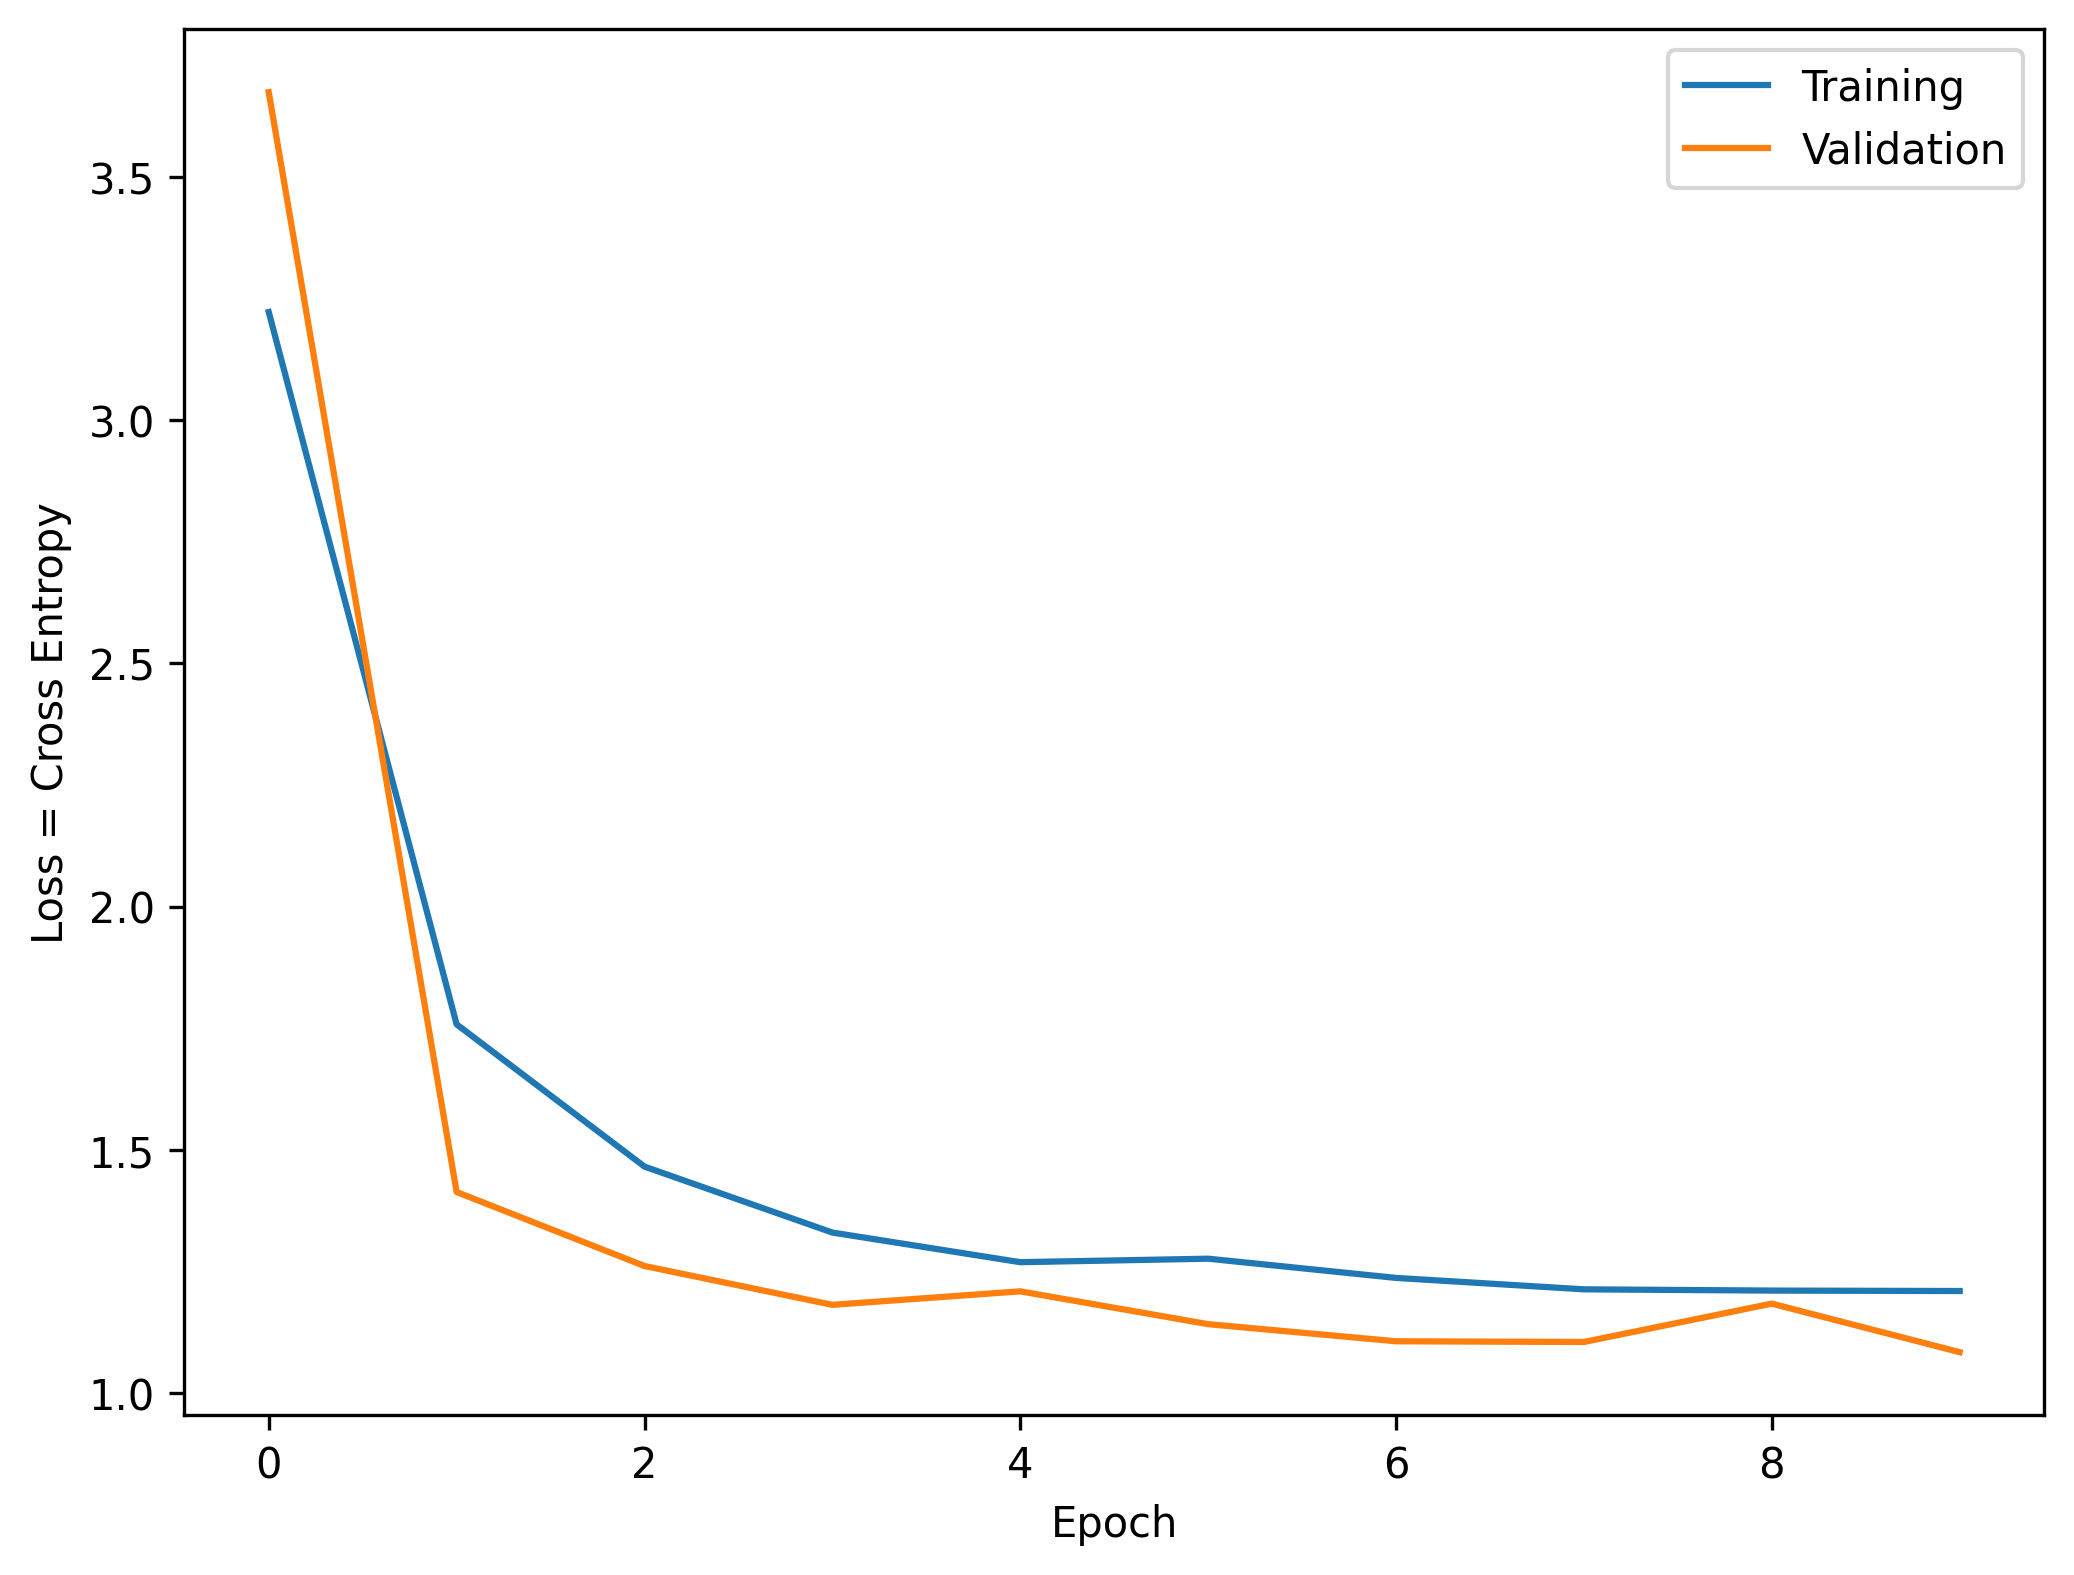

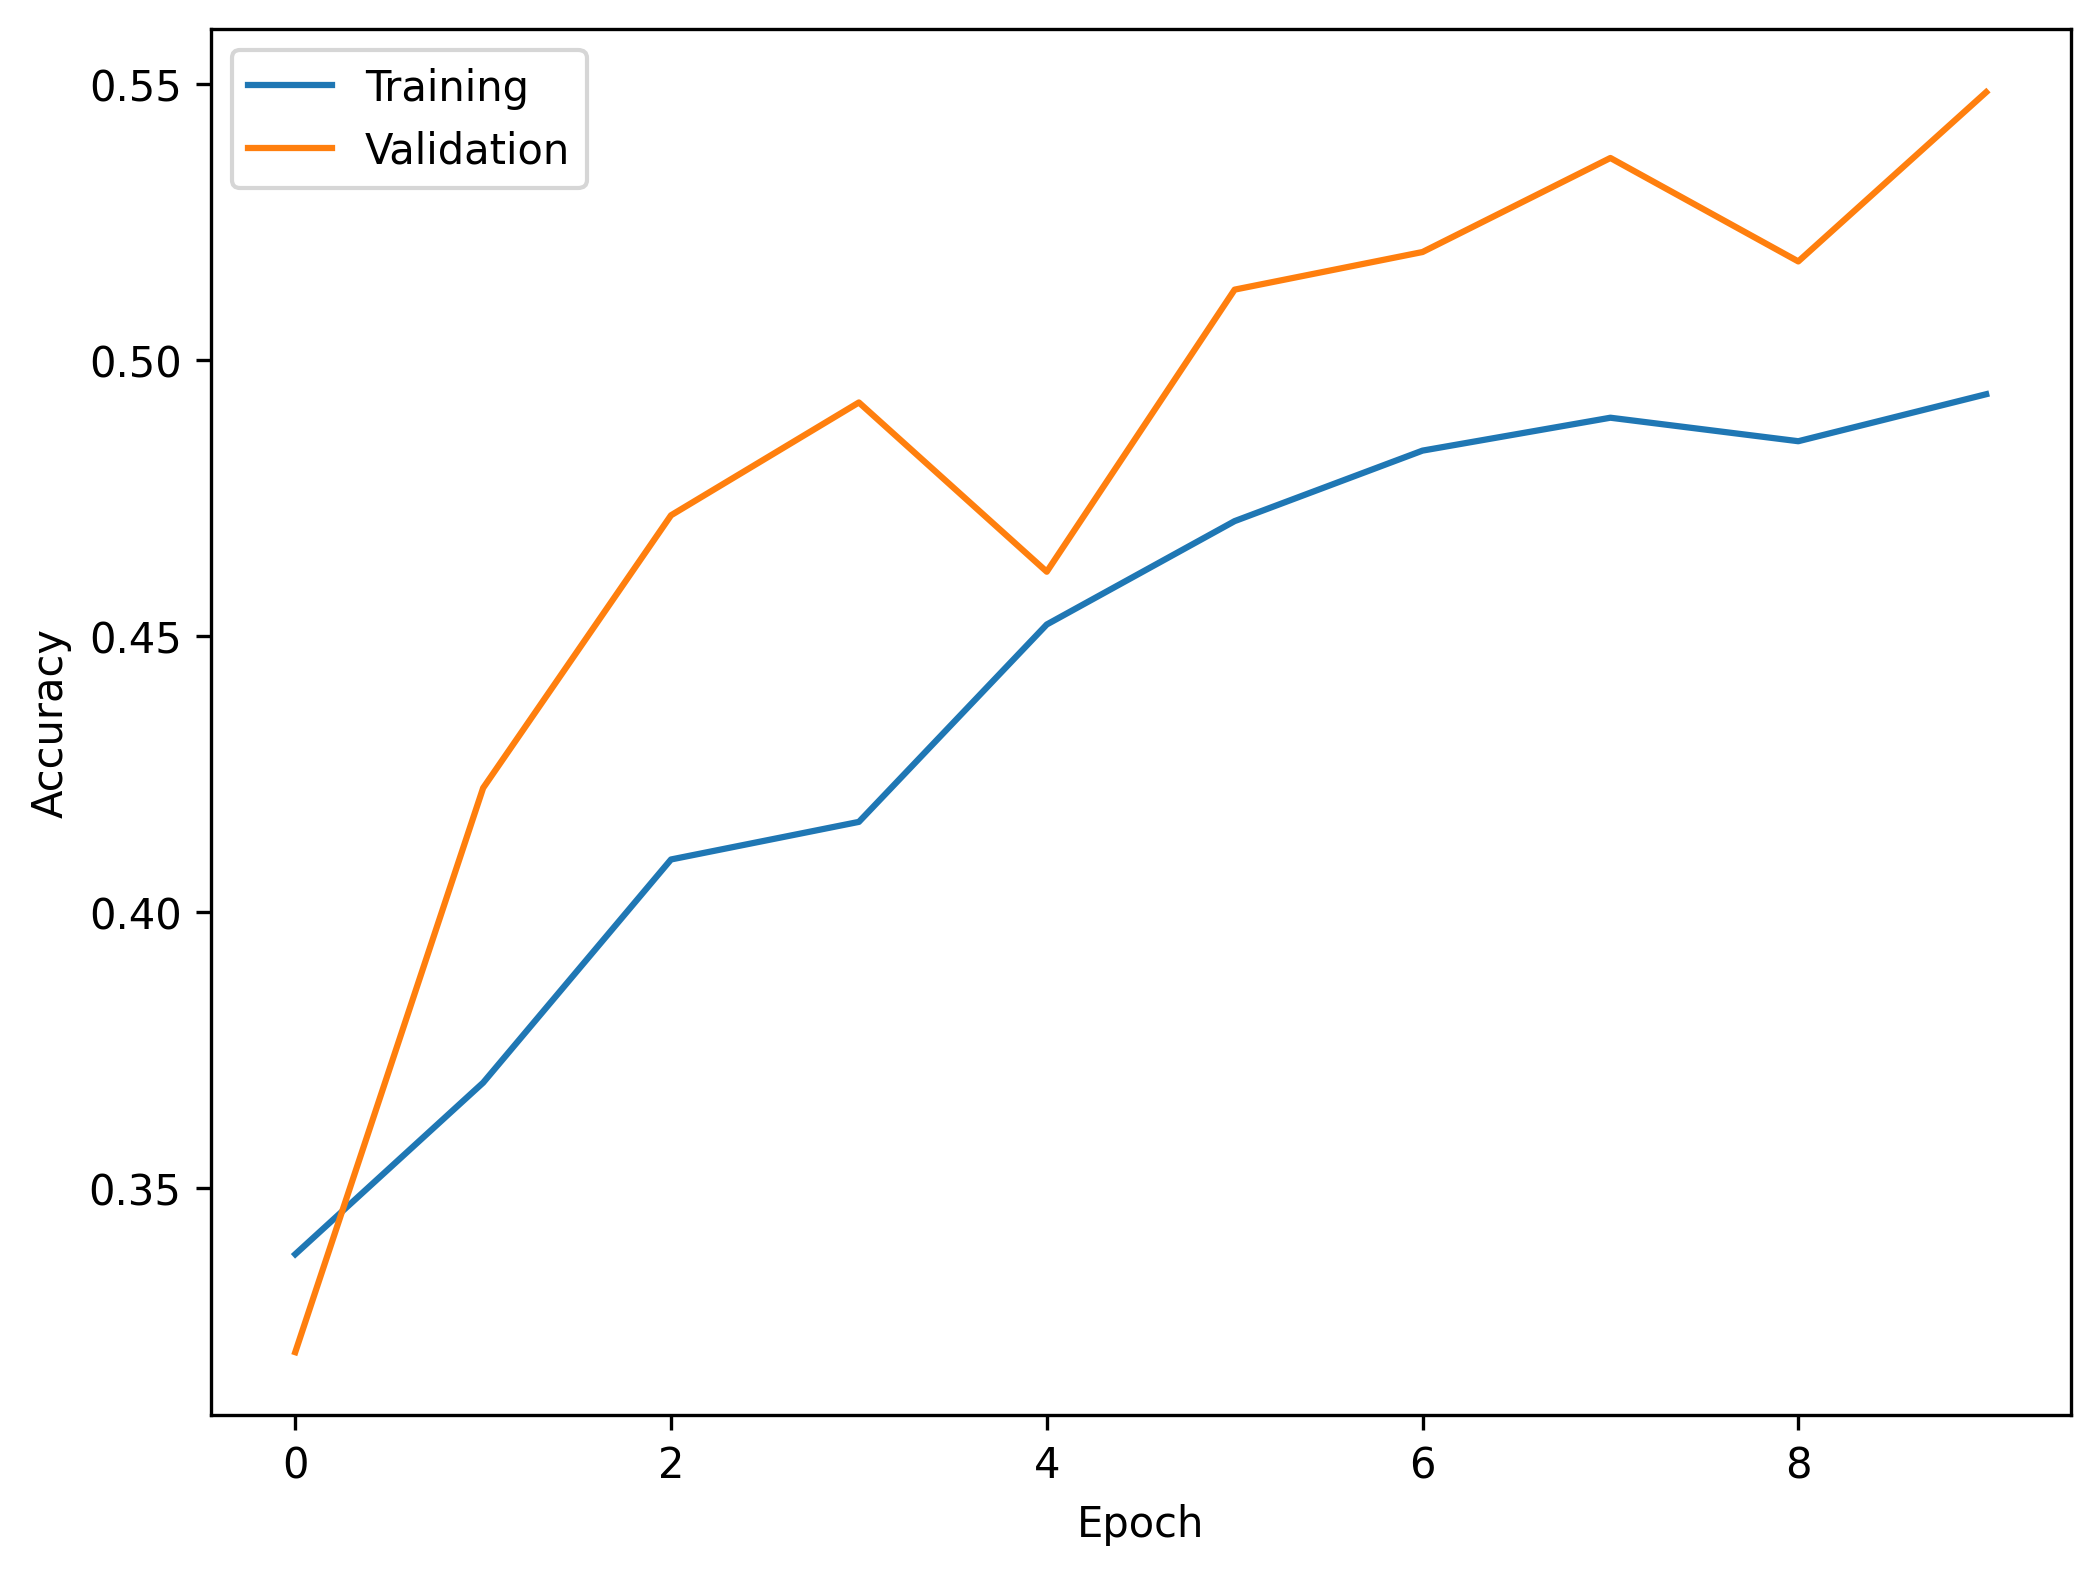

23/23 [==============================] - 2s 87ms/step


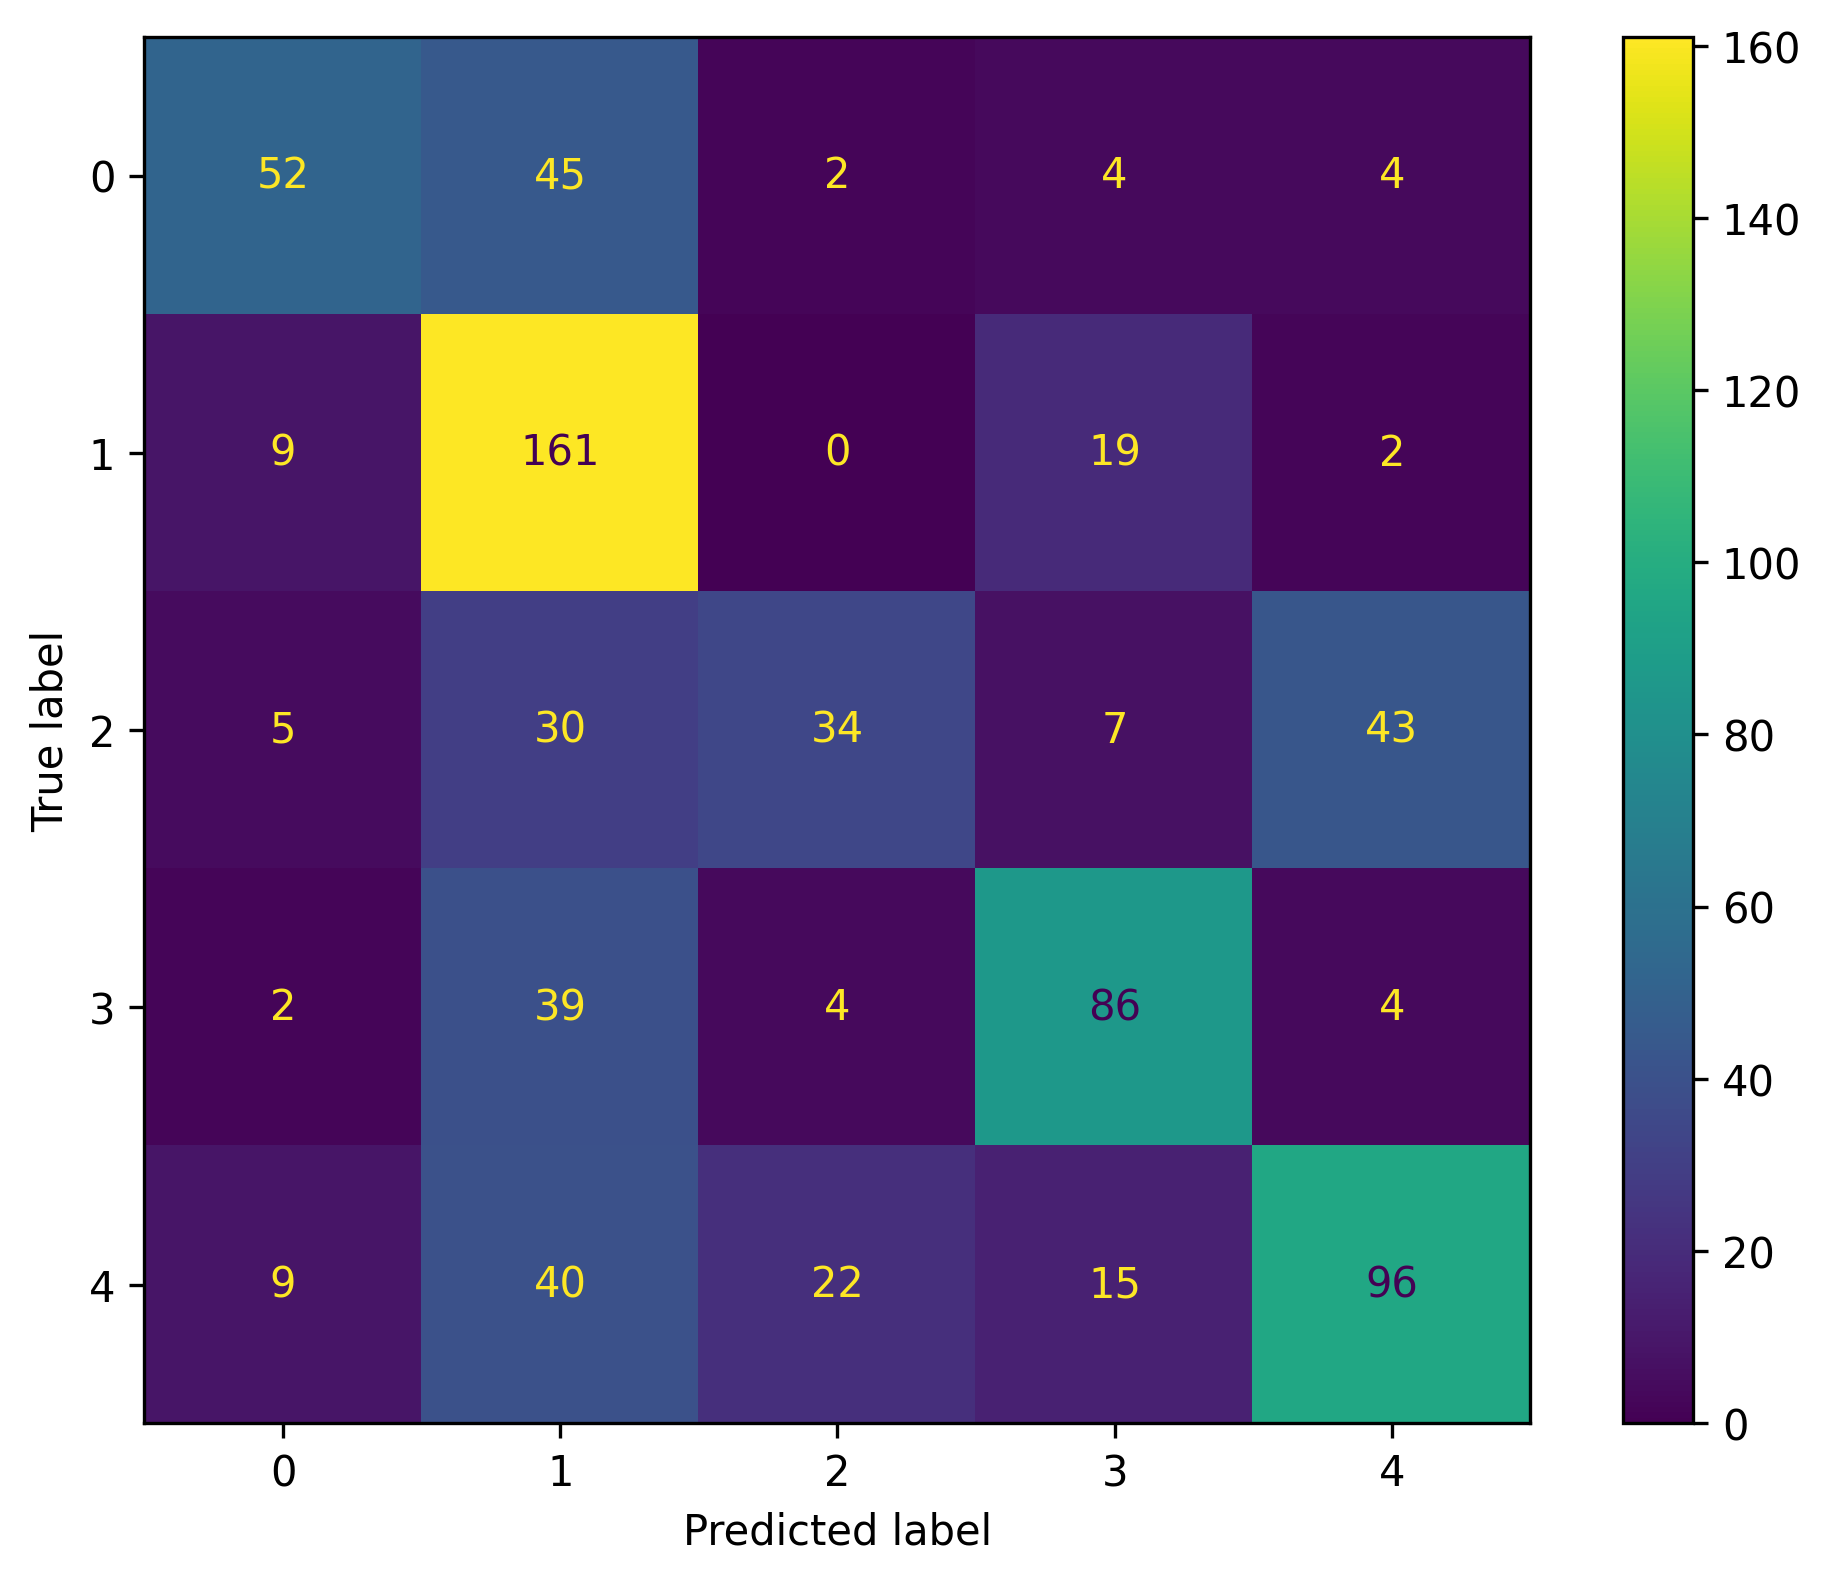

In [42]:
model = Sequential()
# Add the first Convolutional layer. use 32 filters which will each be convolved with the input data to 
#produce 32 feature maps, a kernel_size of 3x3, and the relu activation function.
model.add(Conv2D(32, (5,5), strides = (2, 2), padding= "same", input_shape=(256, 256, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,with a pool size of 2x2.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))

# Apply Batch normalisation to the pooling layer. In this
# set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
          
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding= "same", activation = 'relu'))

# Add a second max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2),  padding= "same"))

# Apply Batch normalisation to the pooling layer. In this
# set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
          
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (5, 5),strides = (2, 2), padding= "same", activation = 'relu'))
# Add a third max pooling layer.
model.add(AveragePooling2D(pool_size = (2, 2), padding= "same"))
# After the final pooling layer, add a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
          
# Apply Batch normalisation to the pooling layer. In this
# set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model.add(BatchNormalization(momentum = 0.9))
          
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes. use the softmax activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model.summary()

# Create an instance of the Adam class,
# and set the learning rate.
adam_optimizer = Adam(learning_rate = 0.01)
# Compile the model. As this is a classification problem,
# use the categorical cross entropy for the
# loss function, and use the accuracy for metrics.
model.compile(adam_optimizer, loss='categorical_crossentropy',metrics='accuracy')

# Specify the batch size to use when
# training the model.
batch_size = 128
# Fit the model, and record the history of the fit.
# will train the model for 20 epochs.
history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size =batch_size, subset = "training"), epochs = 10,
validation_data = train_datagen.flow(x_train_norm,y_train_cat, batch_size = batch_size, subset = "validation"))

#Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)

# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

# Plot the training and validation accuracy
# versus epoch.
plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

# Use the trained model to predict output
# classes in the test set
y_pred = model.predict(x_test_norm)
# Select the highest probablility class
y_pred_class = np.argmax(y_pred, axis=1)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred_class, labels = numerical_labels)

# Create the figure and axes
plt.figure(figsize = (8, 6), dpi = 300)
ax = plt.axes()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = display_labels)
disp.plot(ax = ax)

# Show the plot
plt.show()

# Classification Report

In [43]:
# Import the classification_report function from sklearn.
from sklearn.metrics import classification_report
# Print the classification report, using the predicted class
# labels for the testing set obtained from the final model.
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57       107
           1       0.51      0.84      0.64       191
           2       0.55      0.29      0.38       119
           3       0.66      0.64      0.65       135
           4       0.64      0.53      0.58       182

    accuracy                           0.58       734
   macro avg       0.61      0.56      0.56       734
weighted avg       0.60      0.58      0.57       734

